# Ejemplo de proyecto de ML

Para todo proyecto de machine learning conviene seguir los pasos siguientes:

1. Determinar que problema queremos resolver, cual es la pregunta que queremos responder.
2. Obtener los datos y limpiarlos.
3. Explorar los datos mediante visualizaciones y sumarios.
4. Preparar los datos para los métodos que pensamos probar (escalar, normalizar, binning, one-hot encoding, etc).
5. Probar los distintos modelos y seleccionar los mejores.
6. Ajustar los (hiper)parámetros para tener los mejores resultados. También podemos combinar distintos modelos en un ensamble.
7. Presentar los resultados.

## Objetivo

Nos interesa predecir el precio de las casas en el estado California. Para eso vamos a usar datos del censo de 1990 que incluye mediciones de población, ingreso, y precio mediano de las casas para cada bloque censal (un bloque censal es una unidad geográfica utilizada por la oficina de censo de Estados Unidos, típicamente tiene entre 600 y 3000 habitantes).

### Scoring

Para evaluar nuestras predicciones, vamos a usar [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

## Data

https://github.com/ageron/handson-ml/tree/master/datasets/housing

> This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Datos habitacionales de California del censo de 1990.

Atributos:
- latitud
- longitud
- mediana de la antigüedad de las casas
- número total de habitaciones
- número total de dormitorios
- población
- casas
- mediana del ingreso
- mediana del valor de las casas
- proximidad al océano

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
sns.set(rc={'figure.figsize': (12,8)})

In [21]:
df = pd.read_csv('data/housing.csv')

In [22]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Tenemos 9 variables numéricas y una categórica: `ocean_proximity`, que clasifica los grupos entre los que están cerca del océano, cerca de la Bahía, en el interior del estado o en una isla.

In [25]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

También vemos que hay datos faltantes en la columna `total_bedrooms`. Más adelante veremos cómo lo manejamos.

In [26]:
df['total_bedrooms'].isna().sum()

207

In [27]:
df[df['total_bedrooms'].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

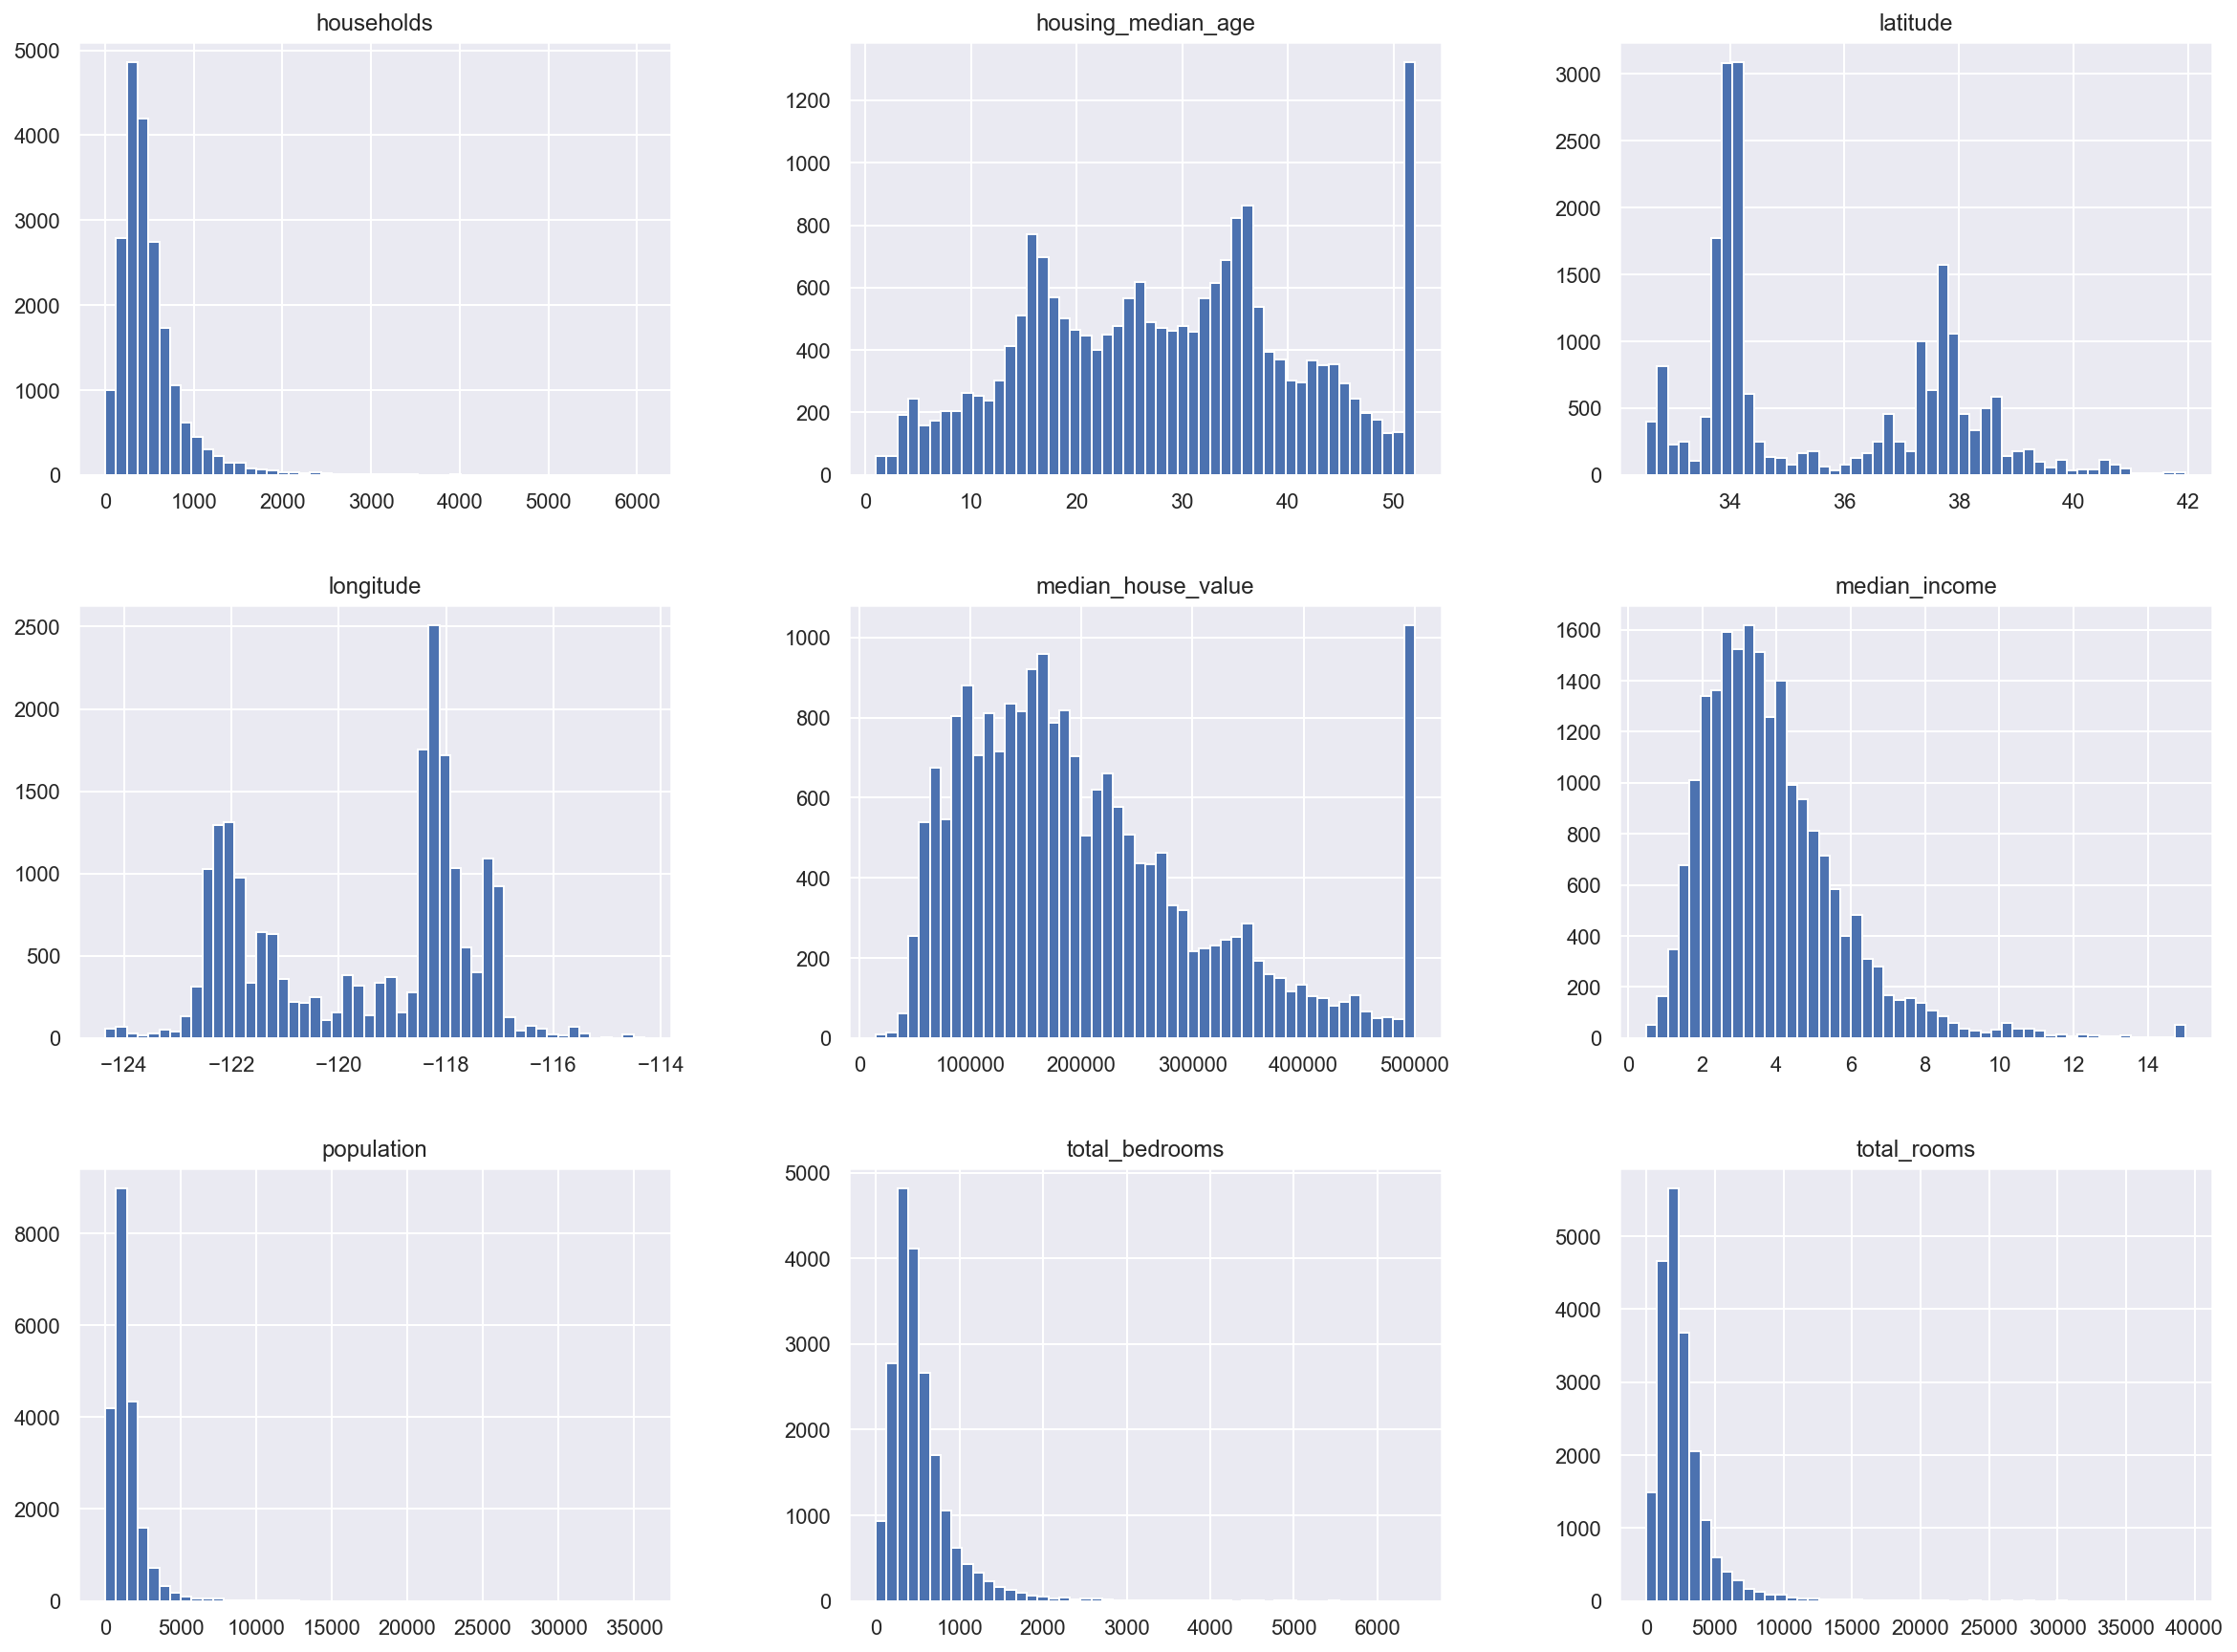

In [28]:
df.hist(bins=50, figsize=(20,15));

Notar que la mediana del ingreso (*median income*) claramente no está expresada en dólares. El valor está preprocesado de manera que el máximo es $15$ para los ingresos más altos y el mínimo $0.5$ para los más bajos.

La edad y el valor de casa promedio tienen "cortados" sus valores máximos (i.e todo valor promedio de casa superior a $500.000$ aparece como $500.000$). Esto podría ser un problema si uno quiere predicciones precisas para valores mayores a $500.000$.

Muchos histogramas tienen *colas* muy largas. Muchos métodos de ML funcionan mejor si los atributos tienen una forma más normal (campana de Gauss), así que los vamos a transformar.

Graficamos ahora los diferentes bloques poblacionales.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


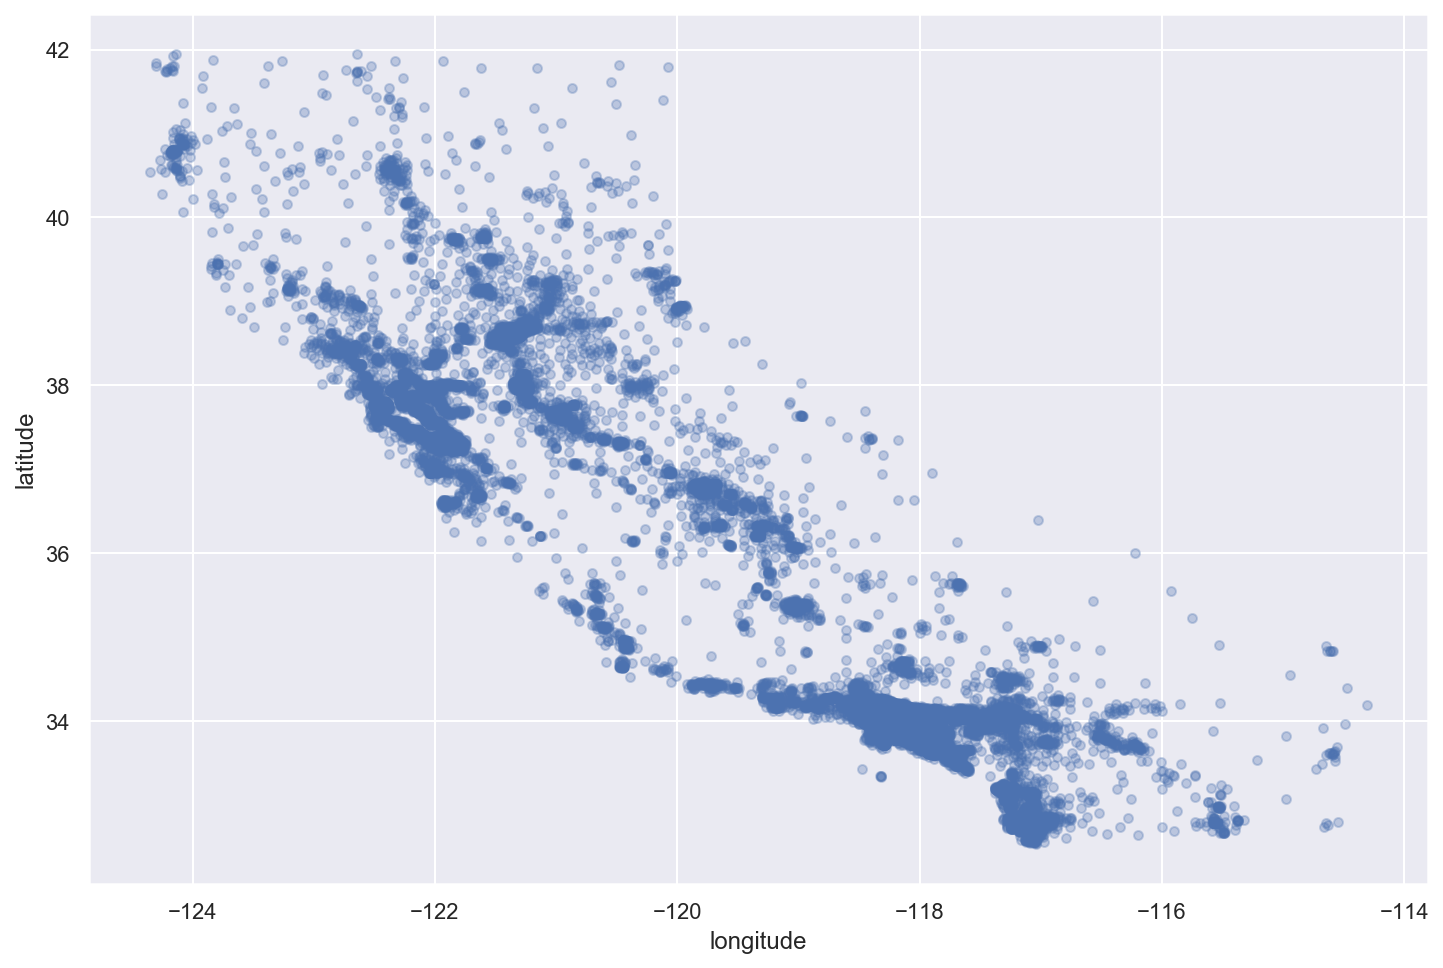

In [29]:
df.plot(kind="scatter", x="longitude",y="latitude", alpha=0.3);

Abajo, el mismo gráfico pero con un mapa de colores según el valor promedio de las casas y el radio de cada bloque ajustado según su población. Se ve que en general la proximidad al océano suele aumentar el valor, como también la densidad de población.

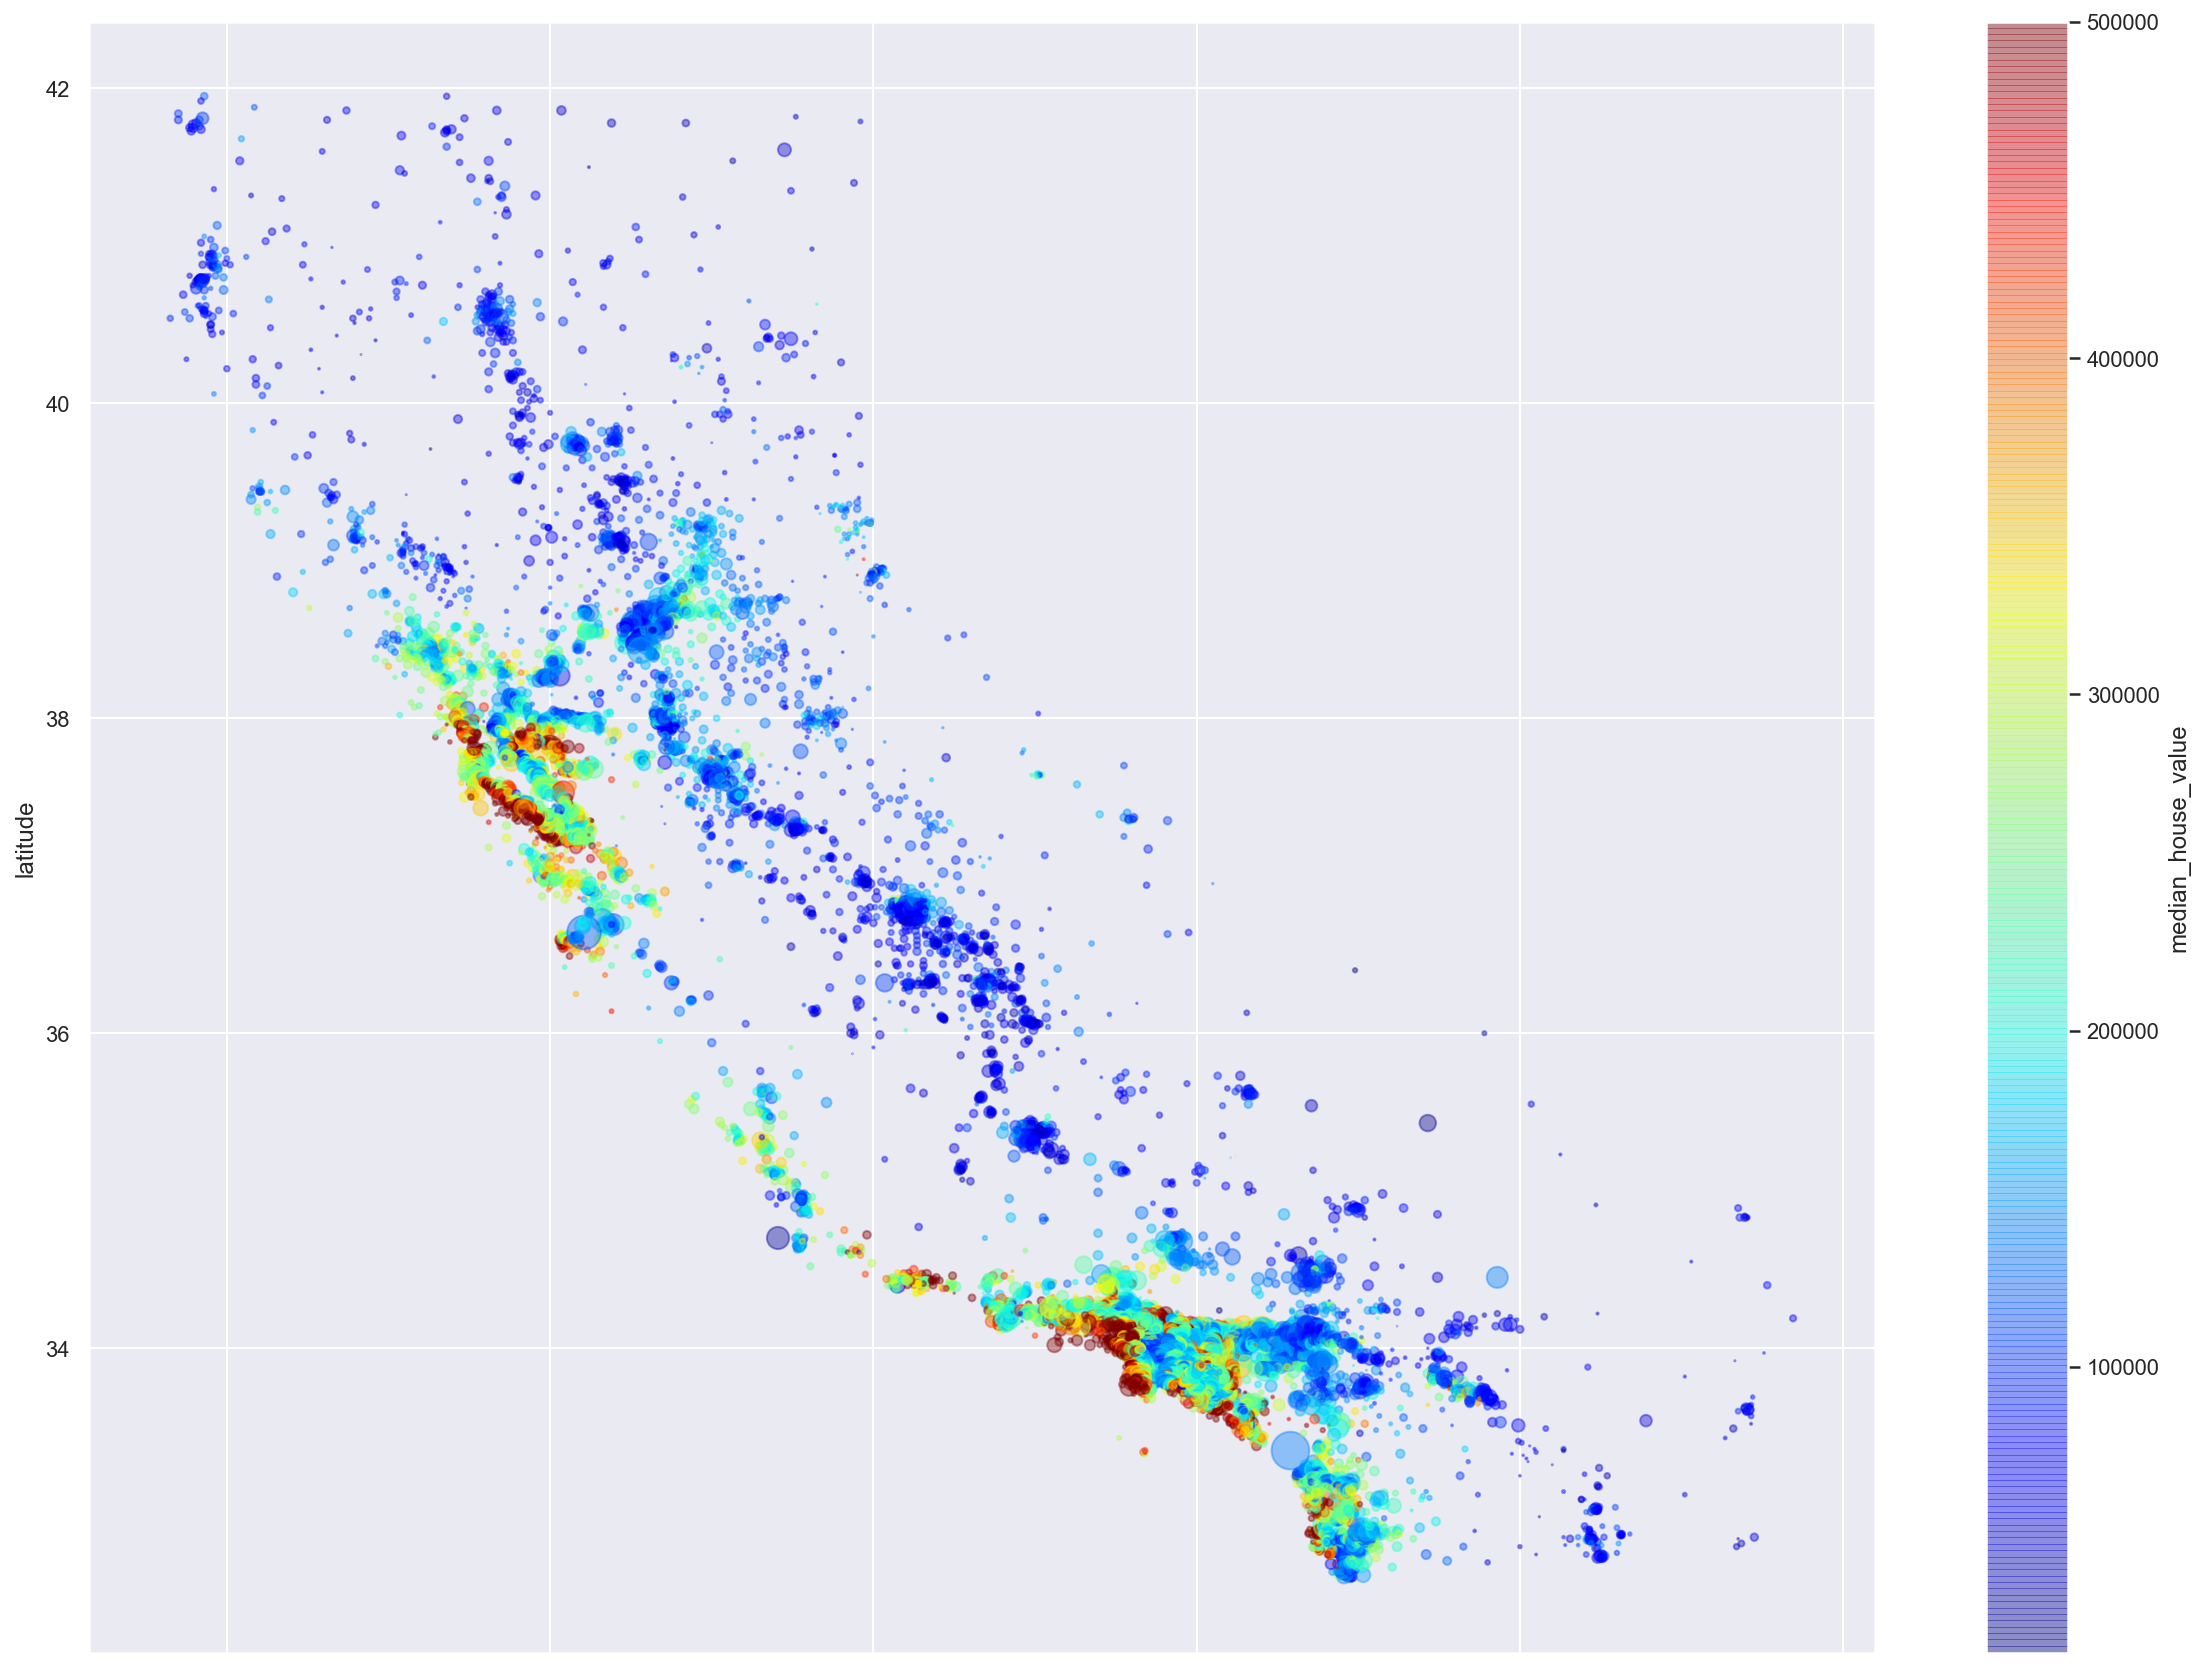

In [30]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, figsize=(20,15),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True);

En particular nos detenemos en la relación entre ingreso medio y valor medio.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


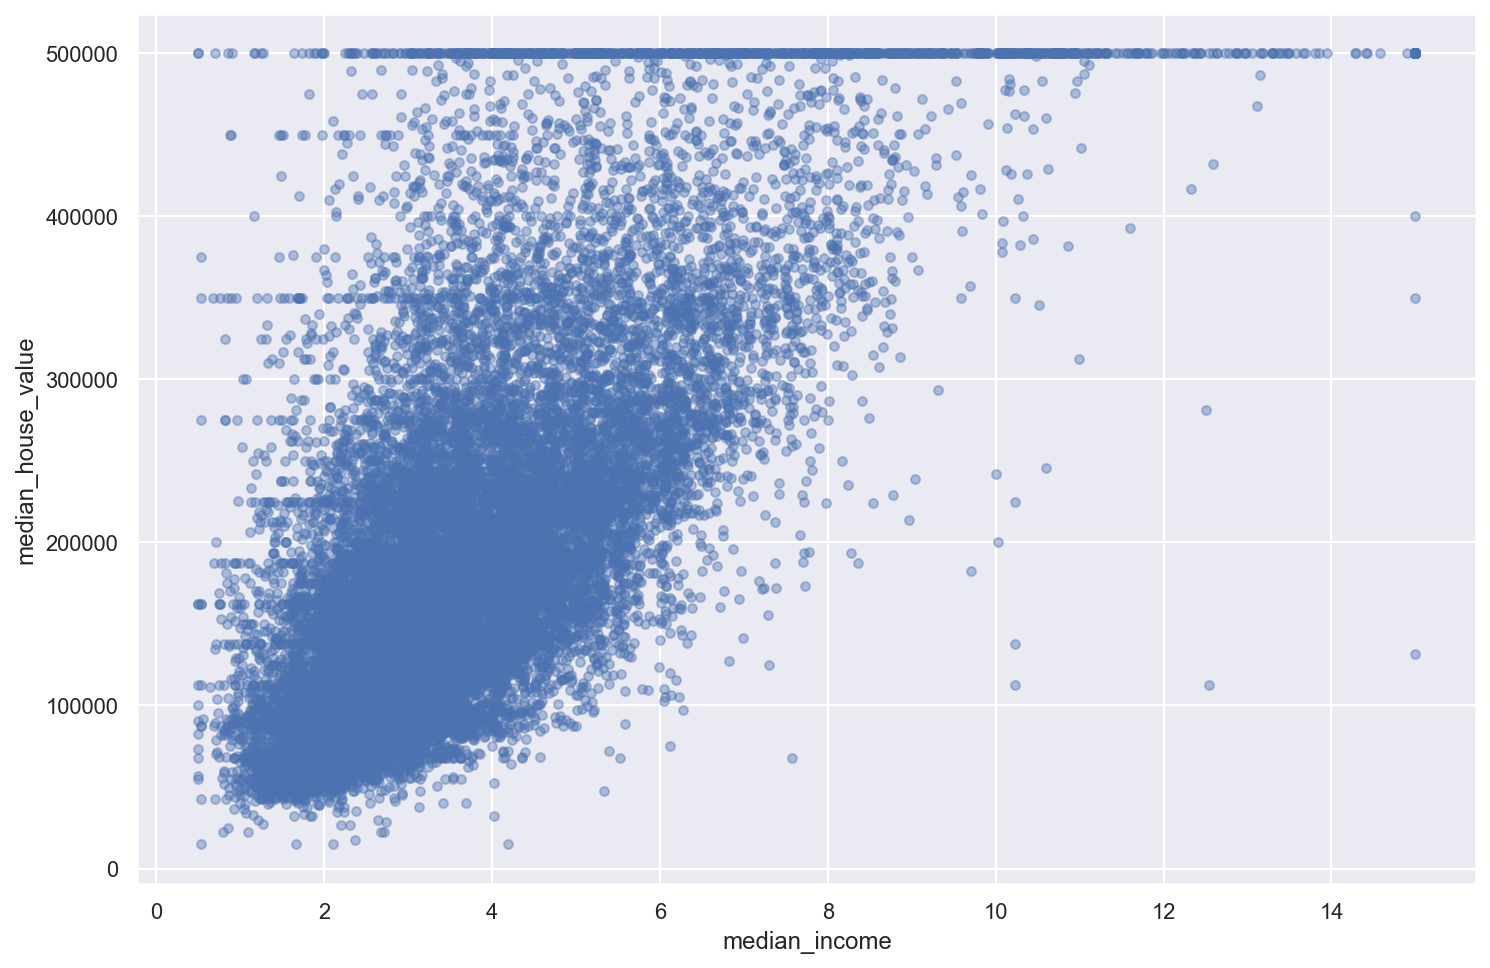

In [31]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4);

Como es de esperar, parece haber una fuerte correlación entre las dos variables. Se ve además el "corte" que se hizo sobre el valor en $500.000$ en la linea horizontal arriba de todo. 

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

Teniendo en cuenta que el atributo mas importante a la hora de predecir probablemente sea el ingreso medio, para hacer el split entre *training* y *test* set nos gustaría que en ambos conjuntos haya una proporción similar de las distintas categorías de este atributo al del conjunto original. Es decir, queremos que los conjuntos de *training* y *test* sean representativos del total en cuanto a ingreso promedio. 

Como el ingreso promedio es un valor continuo, primero lo separamos en 5 categorías distintas para poder hacer un `StratifiedShuffleSplit` en base a estas categorías. Este split se asegura de que el train y test set tengan la misma proporción de cada categoría que el dataset original.

In [33]:
df["income_cat"] = pd.cut(df["median_income"], bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5]) 

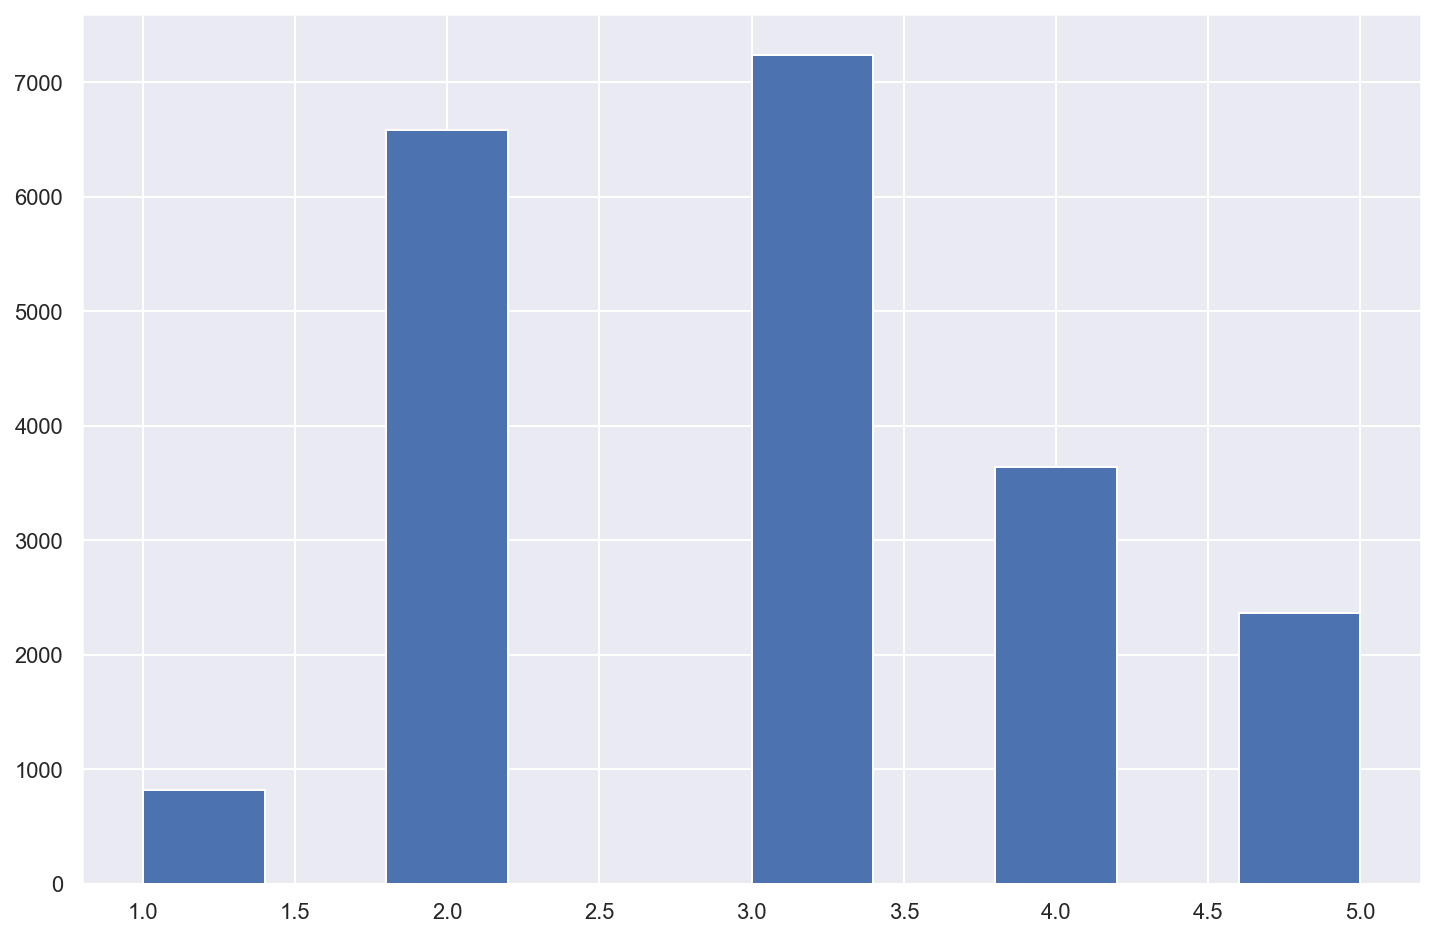

In [34]:
df["income_cat"].hist();

Ahora un pairplot de algunos de los atributos más importantes, coloreado según categoría de ingresos.

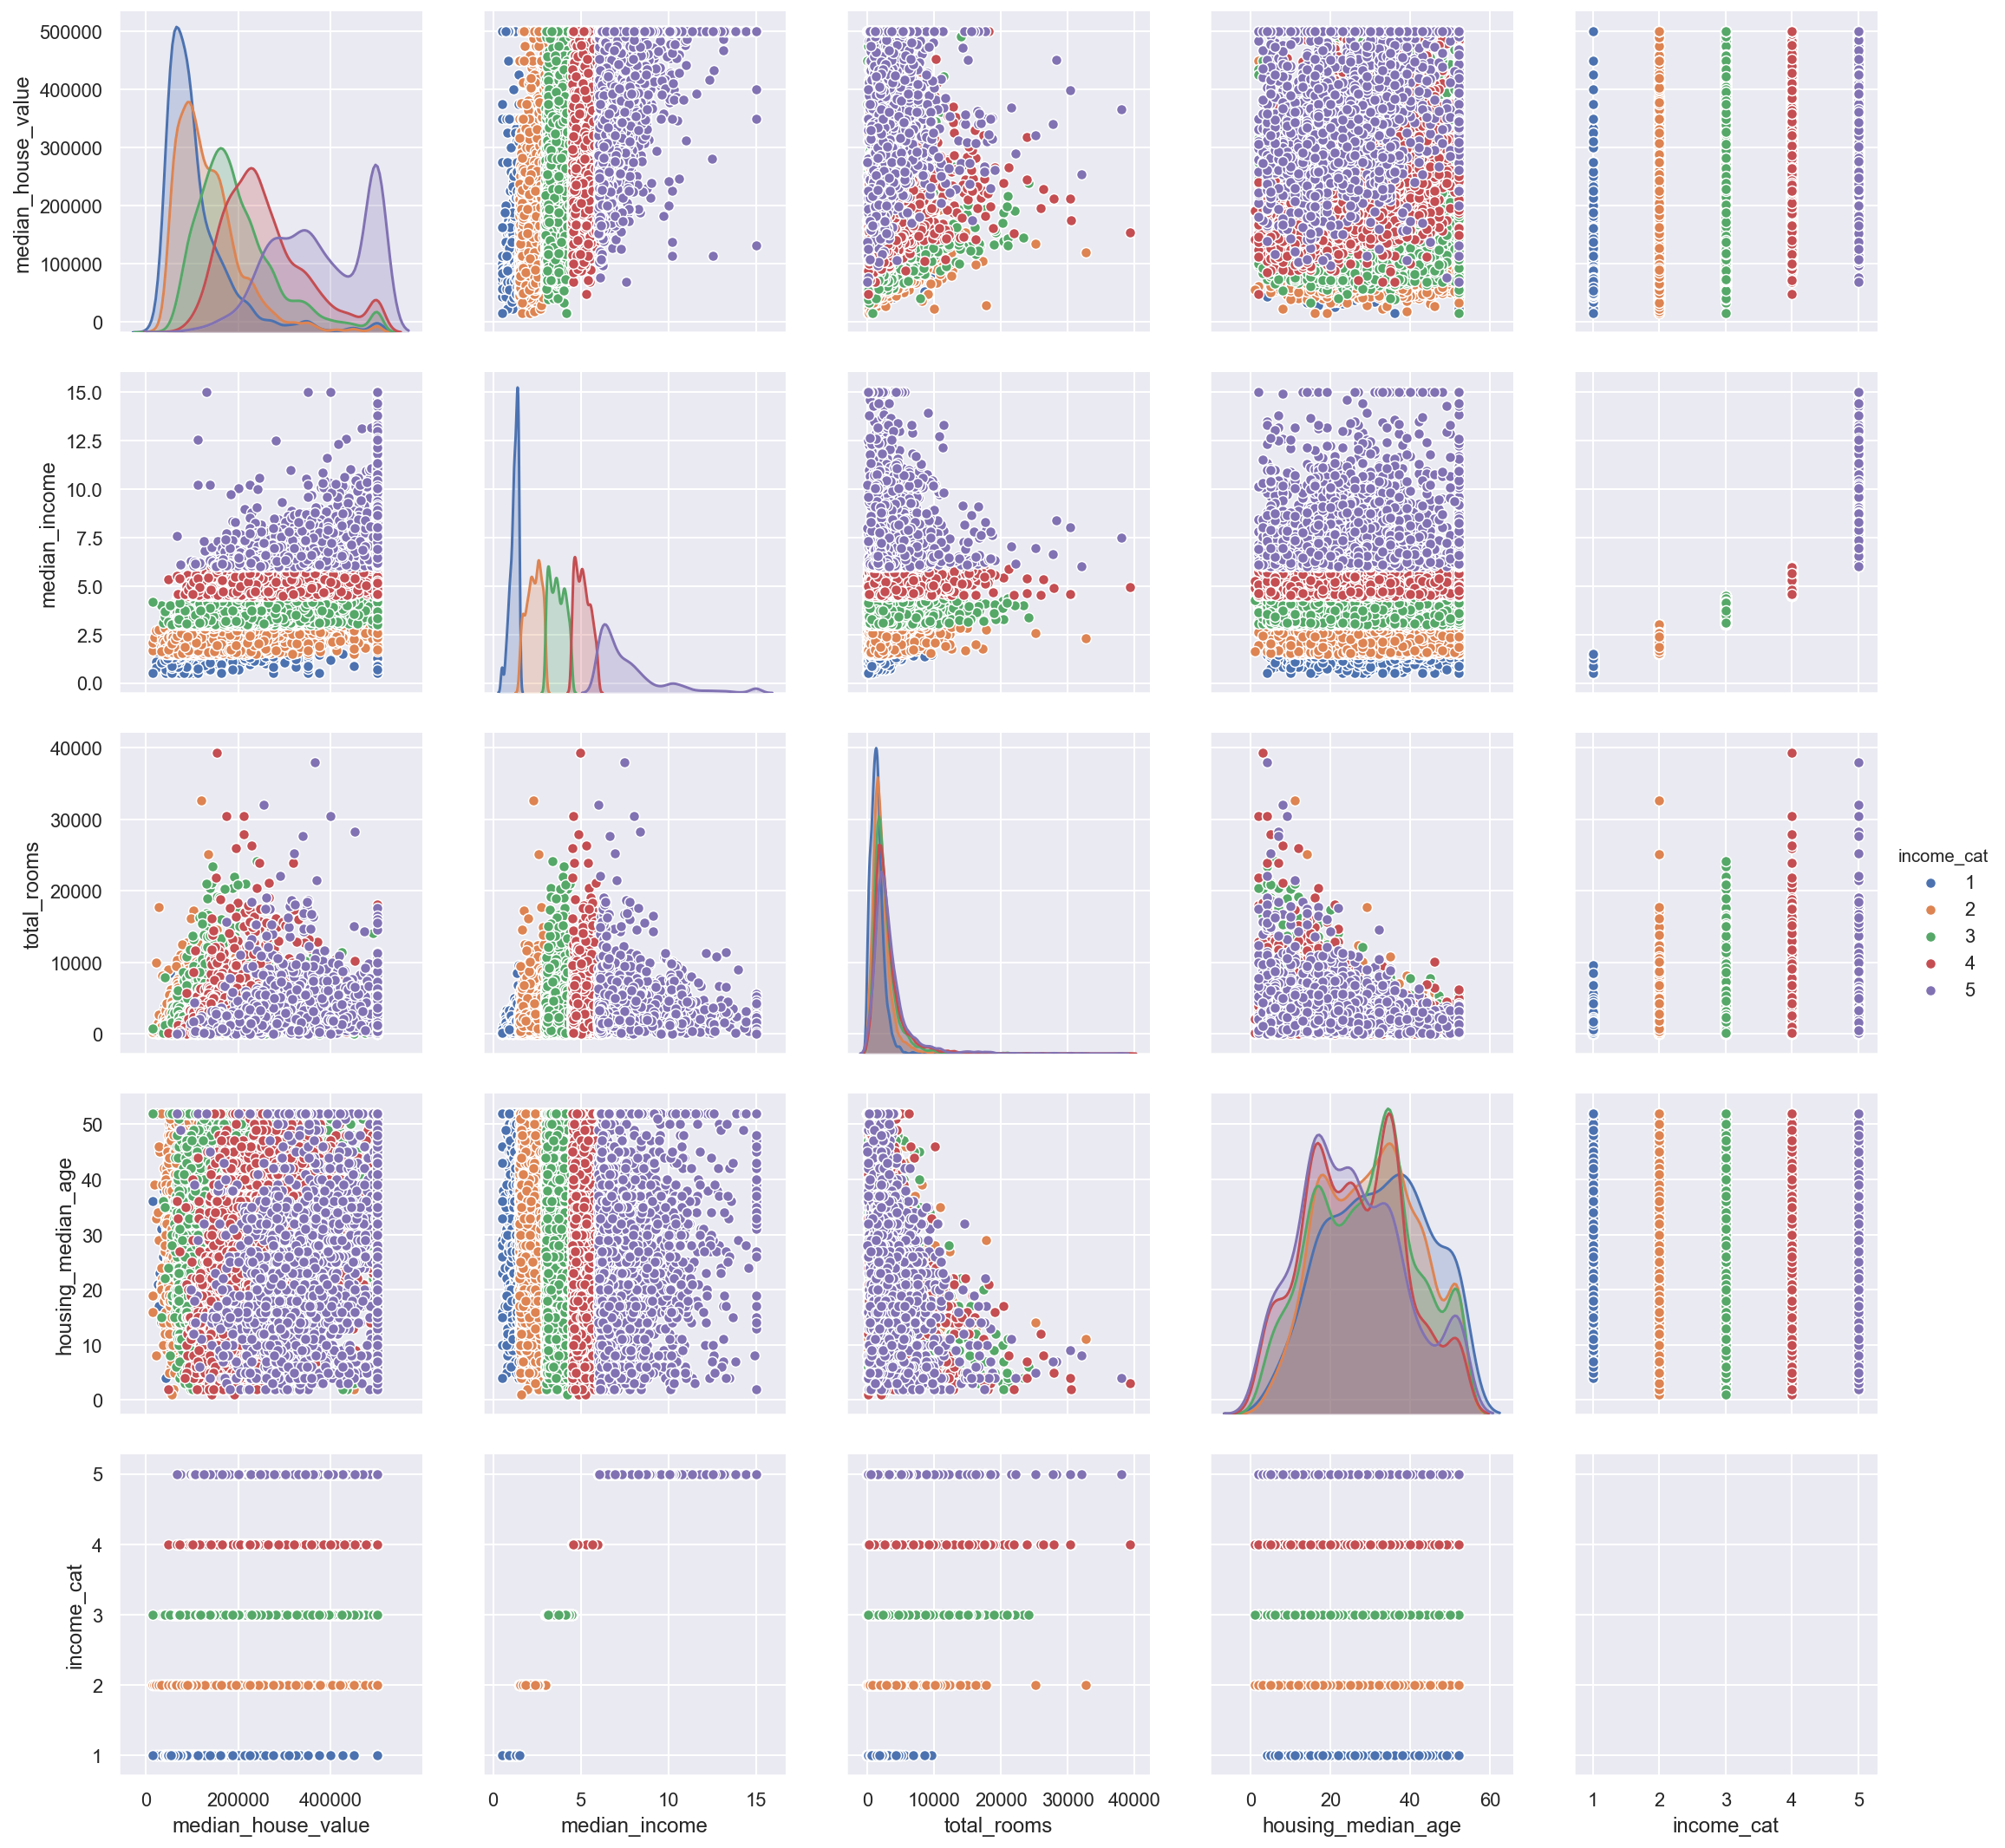

In [35]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "income_cat"]
sns.pairplot(data=df[attributes], hue='income_cat', height=3, aspect=1);

In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in split.split(df, df["income_cat"]):
    strat_train_set = df.iloc[trainIndex]
    strat_test_set = df.iloc[testIndex]

### Arbol de decisión con un mínimo preprocesamiento de los datos

Hacemos una copia del dataset y dropeamos las rows que tienen en la columna **total_bedrooms** elementos vacíos

In [37]:
df_simple_rf = df.copy()
# Dropeamos las filas con "total_bedrooms" NaN
df_simple_rf = df_simple_rf.dropna(subset=["total_bedrooms"])

In [38]:
df_simple_rf

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity income_cat  
0            NEAR BAY          5  
1            NEAR BAY          5  
2            NEAR BAY          5  
3            NEAR BAY          4  
4            NEAR BAY          3  
...               ...        ...  
20635          INLAND          2  
20636          INLAND          2  
20637          INLAND          2  
20638          INLAND          2  
20639          INLAND          2  

[20433 rows x 11 columns]

Observamos que la variable **ocean_proximity** es de tipo string, por lo que es necesario convertir la variable  a una variable categórica 

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [40]:
variable_to_convert = df_simple_rf[["ocean_proximity"]]

In [41]:
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)

In [42]:
variable_converted

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

Reemplazamos la variable categórica en el dataset

In [43]:
df_simple_rf["ocean_proximity"] = variable_converted

In [44]:
df_simple_rf

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity income_cat  
0                  3.0          5  
1                  3.0          5  
2                  3.0          5  
3                  3.0          4  
4                  3.0          3  
...                ...        ...  
20635              1.0          2  
20636              1.0          2  
20637              1.0          2  
20638              1.0          2  
20639              1.0          2  

[20433 rows x 11 columns]

Como la variable **income_cat** no tiene una distribución uniforme (observar su histograma), es necesario dividir en un training y un test set que mantengan estas proporciones. Para ello se usa la función **StratifiedShuffleSplit**. Recordar además que la elección de los datos debe hacerse de manera aleatoria.

In [45]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in split.split(df_simple_rf, df_simple_rf["income_cat"]):
    rf_strat_train_set = df_simple_rf.iloc[trainIndex]
    rf_strat_test_set = df_simple_rf.iloc[testIndex]

Dividimos en train y test con stratified

In [46]:
rf_strat_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18052    -121.98     37.25                19.0        755.0            93.0   
17555    -121.87     37.33                37.0       3137.0           685.0   
19195    -122.68     38.44                36.0       1311.0           259.0   
17808    -121.87     37.41                17.0       3719.0           588.0   
10265    -117.85     33.90                25.0       1548.0           256.0   
...          ...       ...                 ...          ...             ...   
17416    -120.46     34.65                22.0       1298.0           358.0   
2136     -119.73     36.80                24.0       1316.0           249.0   
7354     -118.15     33.96                33.0       1471.0           451.0   
11880    -117.39     33.98                37.0       2337.0           452.0   
9887     -122.29     38.30                52.0        935.0           224.0   

       population  households  median_income  median_house_value  \
18052       267.0        99.0        15.0000            500001.0   
17555      2048.0       651.0         3.0156            270300.0   
19195       648.0       268.0         3.4545            161200.0   
17808      2089.0       561.0         6.7867            273700.0   
10265       811.0       263.0         5.2037            242200.0   
...           ...         ...            ...                 ...   
17416      1272.0       363.0         1.6488            117500.0   
2136        781.0       260.0         3.7578             69200.0   
7354       2272.0       482.0         2.5385            160900.0   
11880       948.0       437.0         3.1450            169100.0   
9887        315.0       207.0         1.8287            146900.0   

       ocean_proximity income_cat  
18052              0.0          5  
17555              0.0          3  
19195              0.0          3  
17808              0.0          5  
10265              0.0          4  
...                ...        ...  
17416              4.0          2  
2136               1.0          3  
7354               0.0          2  
11880              1.0          3  
9887               3.0          2  

[16346 rows x 11 columns]

Separamos en x_train, y_train, x_test, y_test, quedándonos con las columnas correspondiente, recordando que la varible a predecir es **median_house_value**.

In [47]:
x_columns = [ i for i in df_simple_rf.columns if i!='median_house_value']
x_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'income_cat']

In [48]:
x_train = rf_strat_train_set[x_columns]
x_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18052    -121.98     37.25                19.0        755.0            93.0   
17555    -121.87     37.33                37.0       3137.0           685.0   
19195    -122.68     38.44                36.0       1311.0           259.0   
17808    -121.87     37.41                17.0       3719.0           588.0   
10265    -117.85     33.90                25.0       1548.0           256.0   
...          ...       ...                 ...          ...             ...   
17416    -120.46     34.65                22.0       1298.0           358.0   
2136     -119.73     36.80                24.0       1316.0           249.0   
7354     -118.15     33.96                33.0       1471.0           451.0   
11880    -117.39     33.98                37.0       2337.0           452.0   
9887     -122.29     38.30                52.0        935.0           224.0   

       population  households  median_income  ocean_proximity income_cat  
18052       267.0        99.0        15.0000              0.0          5  
17555      2048.0       651.0         3.0156              0.0          3  
19195       648.0       268.0         3.4545              0.0          3  
17808      2089.0       561.0         6.7867              0.0          5  
10265       811.0       263.0         5.2037              0.0          4  
...           ...         ...            ...              ...        ...  
17416      1272.0       363.0         1.6488              4.0          2  
2136        781.0       260.0         3.7578              1.0          3  
7354       2272.0       482.0         2.5385              0.0          2  
11880       948.0       437.0         3.1450              1.0          3  
9887        315.0       207.0         1.8287              3.0          2  

[16346 rows x 10 columns]

In [49]:
y_train = rf_strat_train_set['median_house_value']
x_test = rf_strat_test_set[x_columns]
y_test = rf_strat_test_set["median_house_value"]

### Decision Tree 
Entrenamos un **DecisionTreeRegressor** sin optimización de hiperparámetros (es decir, no hacemos grid search ni cualquier otro método de búsqueda de hiperparámetros óptimos)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [51]:
from sklearn.metrics import mean_squared_error

housing_predictions = tree_regressor.predict(x_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(" Valor de sqrt de MSE obtenido con el decision tree es: ",tree_rmse)

 Valor de sqrt de MSE obtenido con el decision tree es:  69657.20259943133


In [52]:
import numpy as np

x = np.linspace(50,500000,1000,"-")

Text(0, 0.5, 'y test')

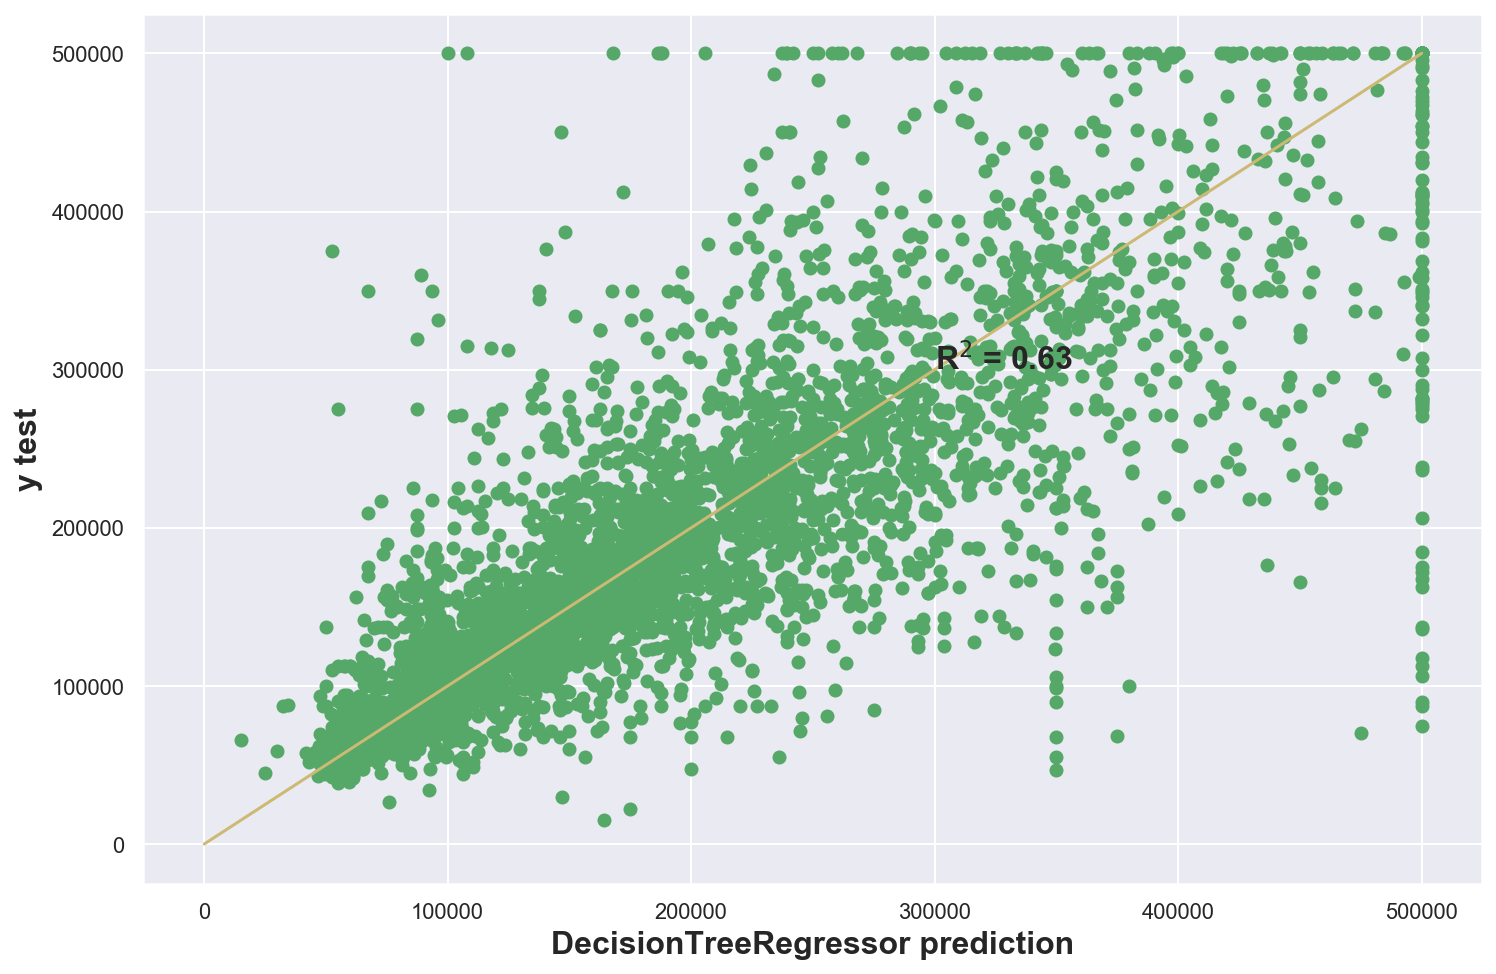

In [53]:
plt.plot(housing_predictions, y_test, "og")
plt.plot(x, x, "-y,")
plt.text(300000, 300000,'R$^2$ = ' + '{:.2f}'.format(tree_regressor.score(x_test, y_test)), fontsize=16, fontweight = 'bold' )
plt.xlabel("DecisionTreeRegressor prediction", fontsize=16, fontweight = 'bold')
plt.ylabel("y test", fontsize=16, fontweight = 'bold')

### Random Forest
Usando ahora un **Random Forest** sin ningún tipo de optimización de hiperparámetros.

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
housing_predictions_forest = forest_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, housing_predictions_forest)
tree_rmse = np.sqrt(tree_mse)
print(" Valor de sqrt de MSE optenido con el decision tree es: ", tree_rmse)

 Valor de sqrt de MSE optenido con el decision tree es:  52507.14462936075


Text(0, 0.5, 'y test')

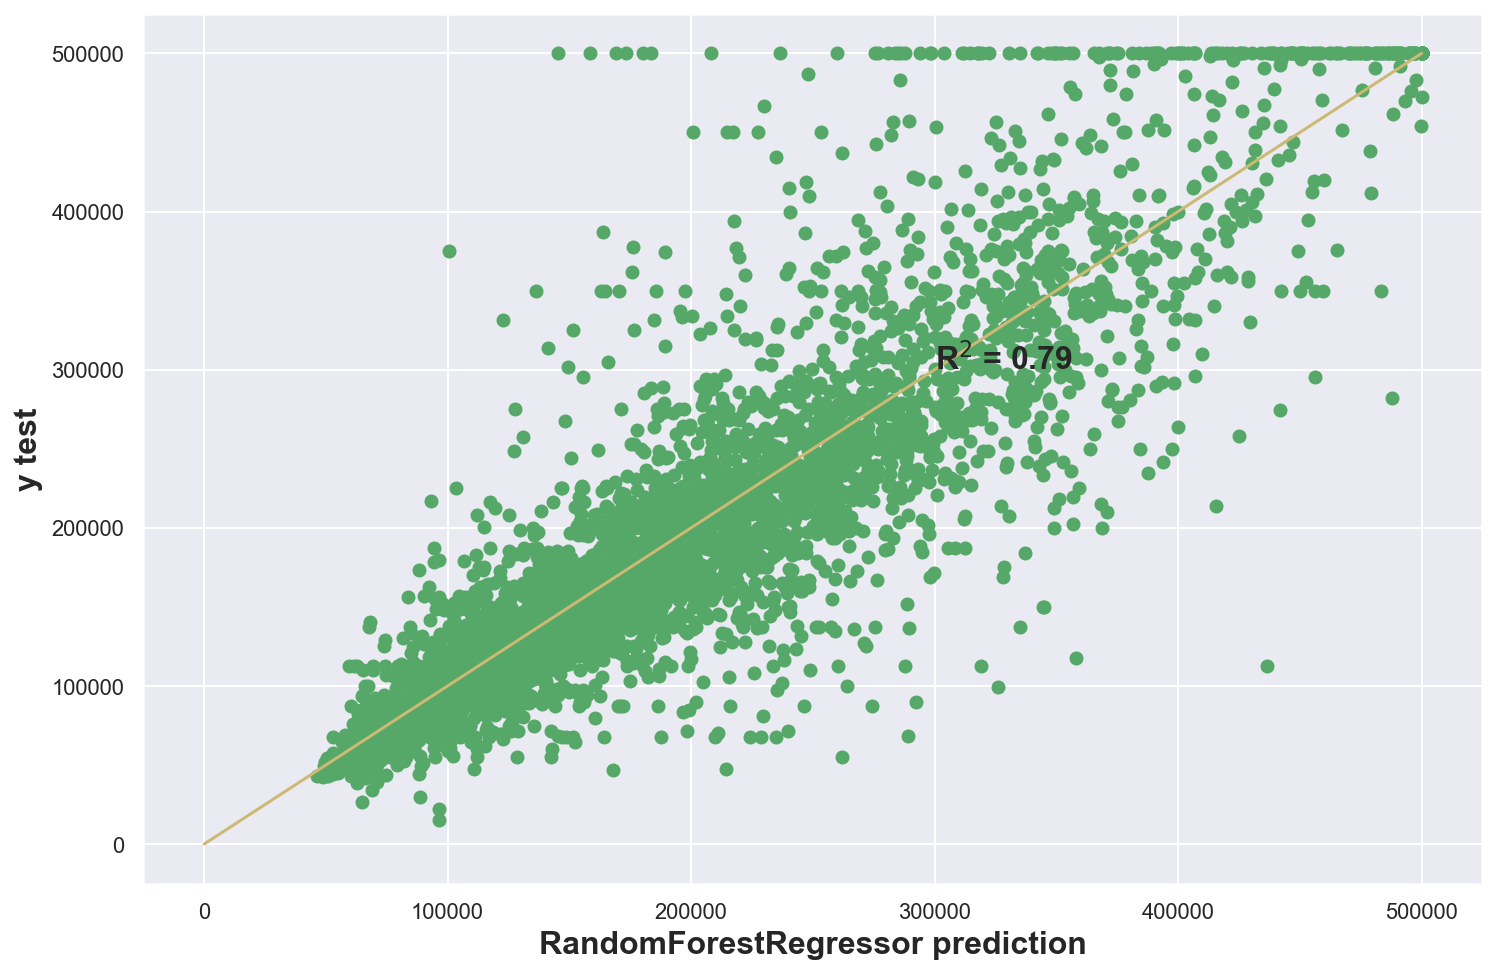

In [59]:
plt.plot(housing_predictions_forest, y_test, "og")
plt.plot(x, x, "-y,")
plt.text(300000, 300000,'R$^2$ = ' + '{:.2f}'.format(forest_reg.score(x_test, y_test)), fontsize=16, fontweight = 'bold' )
plt.xlabel("RandomForestRegressor prediction", fontsize=16, fontweight = 'bold')
plt.ylabel("y test", fontsize=16, fontweight = 'bold')

*Por qué funciona mejor el random forest que el decision tree?*

hint: cantidad de árboles usados en el modelo (un *forest*)

## Preprocesamiento

Para el preprocesamiento de los datos vamos a armar un *pipeline* que se encargue de todo, de manera que solo haya que aplicar una función a los datos.

Empezamos dropeando la columna `income_cat`, que sólo la usamos para hacer el split.

In [19]:
for set in (strat_train_set, strat_test_set):
    set = set.drop("income_cat", axis=1)

La idea va a ser armar dos pipelines, uno que se encargue de procesar las columnas numéricas y el otro las categóricas (en este caso solo la proximidad al océano) y luego unirlos con `FeatureUnion`.

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Para el pipeline numérico vamos a tener 4 partes. El `DataFrameSelector`, que simplemente se ocupa de quedarse con las columnas numéricas, un `SimpleImputer` que se ocupe de imputar los valores `NaN` por la mediana (en este caso solo la columna `total_bedrooms`, pero podrían ser otras), una clase `CombinedAttributesAdder` que se ocupa de agregar unas features nuevas al modelo (`rooms_per_household`, `population_per_household` y quizás también `bedrooms_per_room`) y por último un `StandardScaler` que se ocupe de estandarizar los valores.

El pipeline categórico sólo consiste del selector para quedarse con la columna `ocean_proximity` y un `OneHotEncoder`. La idea detrás del `OneHotEncoder` es que uno a priori tiene las (cinco) distintas categorías de proximidad al océano como número del $0$ al $4$. El problema con esto es que algunos métodos de ML tienen en cuenta la distancia entre los puntos a la hora de hacer regresiones, y con este encoding las distintas categorías no quedan todos a la misma distancia entre sí. Para solucionar esto el `OneHotEncoder` transforma la columna `ocean_proximity` en cinco columnas, cada una toma valores en un array de cinco elementos con unos y ceros, donde el uno indica la categoría a la que pertenece la fila. 

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [22]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()

encoder = OneHotEncoder()
housing_cat_1_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [64]:
# Este es el resultado el OneHotEncoder sobre la columna ocean_proximity
housing_cat_1_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

In [24]:
roomsIX, bedroomsIX, populationIX, householdsIX = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.addBedroomsPerRoom = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,roomsIX]/X[:,householdsIX]
        population_per_household = X[:,populationIX]/X[:,householdsIX]
        if self.addBedroomsPerRoom:
            bedrooms_per_room = X[:,bedroomsIX]/X[:,roomsIX]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [25]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),])

In [26]:
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                        ('cat_encoder', OneHotEncoder()),
                        ])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline),])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape, housing_labels.shape)

(16512, 17) (16512,)


In [27]:
housing_test = strat_test_set.drop("median_house_value", axis=1)
housing_test_labels = strat_test_set["median_house_value"].copy()

In [28]:
housing_test_prepared = full_pipeline.fit_transform(housing_test)

Ya con los datos preprocesados, probamos algunos métodos de regresión comunes.

## Regresión lineal

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
linReg = LinearRegression()
linReg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
housing_predictions = linReg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459945

El RMSE para la regresión lineal dio del orden de $68.000$. Teniendo en cuenta que los valores típicos oscilan entre $120.000$ y $265.000$, es un resultado aceptable pero no increíble.

## Decision tree regressor

Probamos ahora un árbol de decisión.

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

El error de predicción sobre los datos de entrenamiento da cero, lo cual es muy común. Recordemos que estos métodos tienden a overfittear mucho; de hecho, esa es la razón por la que se suelen usar random forests.

Si hacemos cross validation para tener una mejor idea de cómo este modelo generaliza a otros datos, vemos que ahí el RMSE da incluso peor que la regresión lineal.

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [36]:
display_scores(rmse_scores)

Scores: [68161.61749869 66897.55956107 71918.36780785 69725.04328237
 70527.89632355 75291.55330738 71097.19807586 71897.58052401
 76179.92494371 69475.12748712]
Mean: 71117.18688116077
Standard deviation: 2753.7299745488417


In [37]:
lin_scores = cross_val_score(linReg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66877.52325577 66608.12026134 70575.91160151 74179.94794574
 67683.32226871 71103.16842496 64782.65898179 67711.29943408
 71080.40482867 67687.63855013]
Mean: 68828.99955527065
Standard deviation: 2662.7615683713666


## Random forest

Habiendo visto el overfitting del árbol de decisión, probamos ahora un random forest.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Con un random forest el RMSE ya no da cero sobre el training set (lo que sugiere menos overfitteo) pero igual sigue dando muy bajo.

In [40]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18814.526197715844

Haciendo cross validation vemos que ahora el score mejoró mucho, el método generaliza mejor a datos fuera del training set.

In [41]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
    scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [42]:
display_scores(forest_rmse_scores)

Scores: [49526.6591372  47750.99837294 50194.48236714 51841.66927219
 49914.30014767 53633.80403251 48883.99430017 47978.08373557
 53307.44863418 50201.8274973 ]
Mean: 50323.326749687025
Standard deviation: 1928.51414928099


Hasta ahora sólo probamos métodos con los valores de hiperparámetros en default. Usando `GridSearch` podemos probar distinto valores de éstos a ver cuál ajusta mejor, usando el score de cross validation para decidir.

In [43]:
forest_grid = RandomForestRegressor()

Probamos primero todas las combinaciones de los (híper) parámetros `n_estimators` y `max_features` de los valores que pasamos como lista; después hacemos lo mismo pero con `bootstrap` en `False`.

Es importante asegurarse de que el grid search haga el scoring con la métrica que nosotros estamos usando (en este caso RMSE).

In [45]:
forest_regr = GridSearchCV(forest_grid, param_grid, cv=5, scoring='neg_mean_squared_error')

In [46]:
forest_regr.fit(housing_prepared.toarray(), housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [47]:
forest_regr.best_params_

{'max_features': 8, 'n_estimators': 30}

In [48]:
forest_regr.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

A continuación hacemos un *print* del score de cada combinación de hiperparámetros.

In [49]:
cv_results = forest_regr.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]): 
    print(np.sqrt(-mean_score), params)

63471.66327137051 {'max_features': 2, 'n_estimators': 3}
55725.84991142921 {'max_features': 2, 'n_estimators': 10}
53452.317282344244 {'max_features': 2, 'n_estimators': 30}
60388.6566589494 {'max_features': 4, 'n_estimators': 3}
53122.17633719355 {'max_features': 4, 'n_estimators': 10}
51370.0547095232 {'max_features': 4, 'n_estimators': 30}
59233.51030296722 {'max_features': 6, 'n_estimators': 3}
52968.44406714069 {'max_features': 6, 'n_estimators': 10}
50813.07479932839 {'max_features': 6, 'n_estimators': 30}
59614.79885615575 {'max_features': 8, 'n_estimators': 3}
52970.26539006627 {'max_features': 8, 'n_estimators': 10}
50756.85912489808 {'max_features': 8, 'n_estimators': 30}
63298.35904045102 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54546.563144166255 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60863.61978540904 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53392.42907466338 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

El método `predict`, como uno esperaría, hace una predicción usando el modelo que obtuvo el mejor score.

Habiendo ya tuneado los hiperparámetros, vemos cuánto da el RMSE si predecimos contra el test set, que todavia no tocamos. Típicamente esto se haría una vez que uno ya eligió el modelo a usar con todos sus hiperparámetros, para hacerse una idea de qué tan bien va a generalizar.

In [56]:
pred_forest_grid = forest_regr.predict(housing_test_prepared.toarray())

In [57]:
np.sqrt(mean_squared_error(pred_forest_grid, housing_test_labels))

66244.40796235303

Como se ve, este random forest no generaliza tan bien como los puntajes de cross validation nos harían creer.

## SVR

Probamos ahora un `SVR` (Support vector regression), una adaptación del típico método de clasificación `SVM` para problemas de regresión.

In [27]:
from sklearn.svm import SVR

In [28]:
svr = SVR()

In [55]:
svr.fit(housing_prepared.toarray(), housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Probando con los hiperparámetros default, el método resulta muy malo. Directamente el RMSE sobre el train set ya es altísimo y el puntaje de cross validation arroja un valor muy parecido.

In [57]:
housing_predictions = svr.predict(housing_prepared.toarray())
svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

118455.13476469375

In [58]:
svr_scores = cross_val_score(svr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [111278.19965683 119407.30459841 116854.19841062 120327.97864229
 117498.68029855 122169.71157035 117531.7045561  121375.69566777
 120246.96373235 117894.32343717]
Mean: 118458.47605704253
Standard deviation: 2934.380691324086


Hacemos un grid search sobre el método para ver si quizás con otros hiperparámetros el método mejora. En este caso lo ideal sería probar sobre más valores de $C$ que los que usamos a continuación (una forma común es probar con potencias de 10), pero acá probamos sólo 2 porque el método tarda bastante en fittear y esto es más que nada para ilustrar. Como dice la página de `sklearn`: 
```
The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.
```

In [29]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10 ** 6]}

In [30]:
svr_grid = SVR()

In [31]:
regr = GridSearchCV(svr_grid, parameters, scoring='neg_mean_squared_error')

In [32]:
regr.fit(housing_prepared.toarray(), housing_labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1000000], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [36]:
housing_predictions = regr.predict(housing_prepared.toarray())
regr_mse = mean_squared_error(housing_labels, housing_predictions)
regr_rmse = np.sqrt(regr_mse)
regr_rmse

50663.78282457026

In [37]:
regr.best_params_

{'C': 1000000, 'kernel': 'rbf'}

In [38]:
results = regr.cv_results_

Como puede verse, el método mejora muchísimo cambiando los hiperparámetros.

In [40]:
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_score), params)

108968.2694281854 {'C': 1, 'kernel': 'linear'}
118532.195275425 {'C': 1, 'kernel': 'rbf'}
70359.34851466323 {'C': 1000000, 'kernel': 'linear'}
55305.68203280173 {'C': 1000000, 'kernel': 'rbf'}


Haciendo la predicción sobre el test set como lo hicimos para el random forest se ve que el SVR parece generalizar mejor a otros datos.

In [45]:
pred_grid = regr.predict(housing_test_prepared.toarray())

In [46]:
np.sqrt(mean_squared_error(pred_grid, housing_test_labels))

55680.106872018085

## Redes Neuronales

Utilizamos un modelo de red neuronal con los datos que estaban poco procesados

In [60]:
from keras.models import Sequential
from keras.layers import Dense
import keras 
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


Definimos nuestra función de sqrt MSE para imprimirla durante el entrenamiento

In [61]:
def sqrt_mse(true_labels, predictions):
    sqrt_error = K.sqrt(K.mean(K.square(predictions - true_labels), axis=0))
    return sqrt_error

Definimos el optimizador a utilizar, en este caso usamos Adam

In [66]:
opt_adam = keras.optimizers.Adam(learning_rate=0.1)

Definimos un modelo que va a ser de tipo *sequential*. Generalmente para modelos simples es bastante útil esta funcion, ya que permite ir agregando capas al modelo usando la función *add( )*. Recordar que al final siempre hay que hacer un *compile( )* del modelo.

In [67]:
model = Sequential()
model.add(Dense(128, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer=opt_adam, metrics=[sqrt_mse])

In [68]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=200, verbose=0)

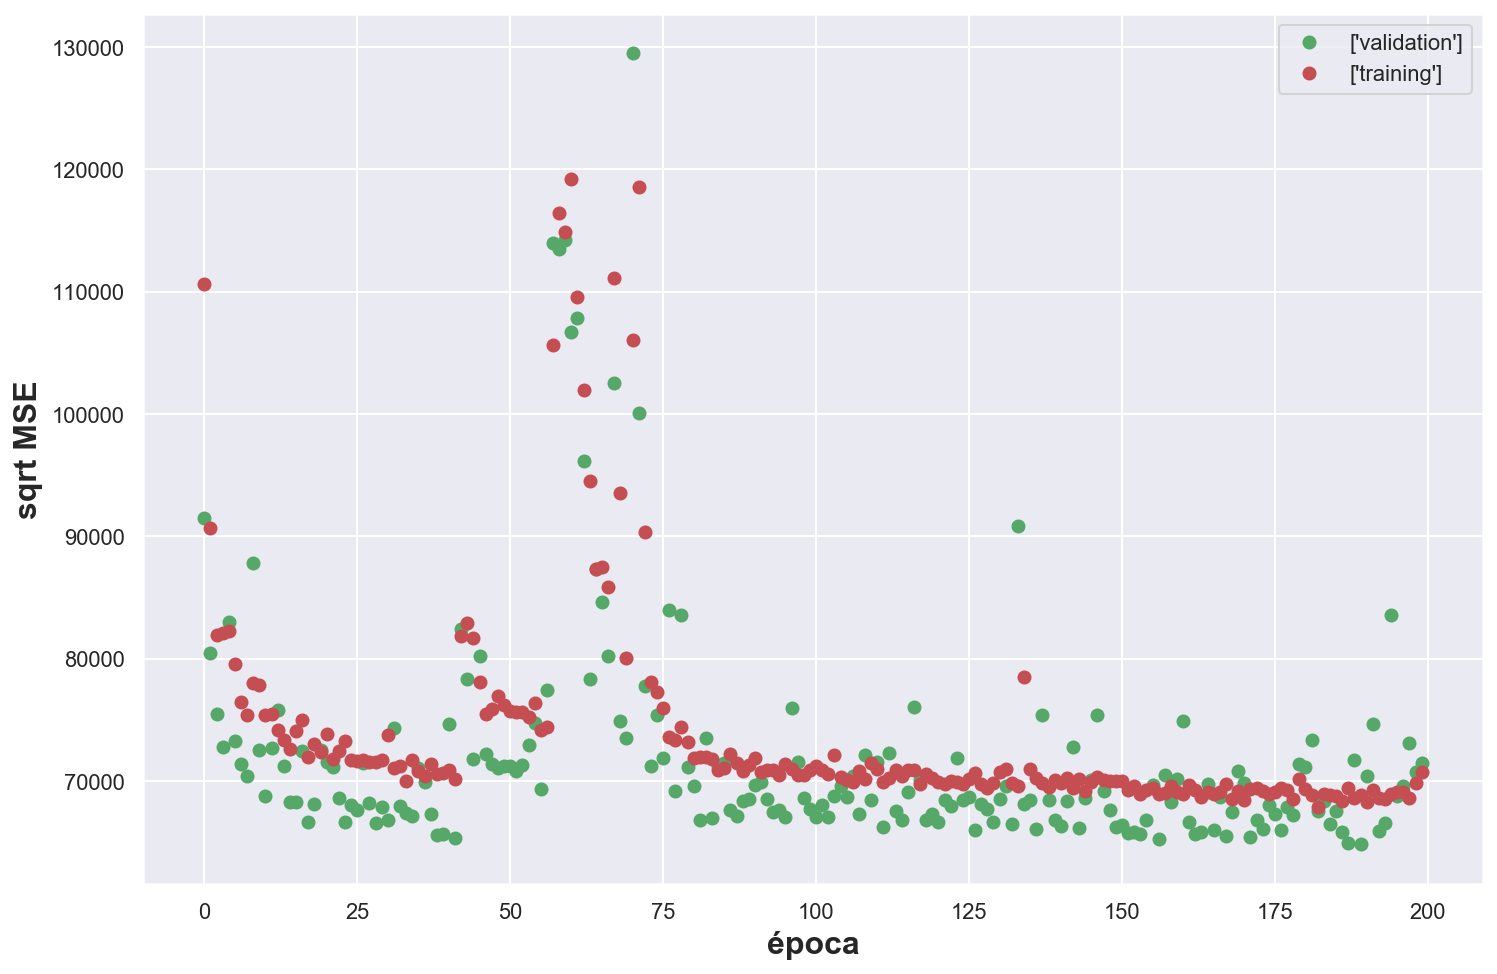

In [69]:
plt.plot(history.history['val_sqrt_mse'], "og", label=['validation'])
plt.plot(history.history['sqrt_mse'], "or", label='training'])
plt.xlabel("época",  fontsize=16, fontweight = 'bold')
plt.ylabel("sqrt MSE",  fontsize=16, fontweight = 'bold')
plt.legend()

Qué nos dice esto sobre el entrenamiento? si bien se observa que aprende el modelo ya que baja el error a medida que avanzan las épocas, hay muchos saltos. Por qué pasa esto y como se puede mejorar? en principio bajando el learning rate o tasa de aprendizaje.


Entrenamos entonces un modelo idéntico al anterior pero con una tasa de aprendizaje menor.

In [70]:
opt_adam = keras.optimizers.Adam(learning_rate=0.05)

In [71]:
model = Sequential()
model.add(Dense(128, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer=opt_adam, metrics=[sqrt_mse])

In [72]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=200, verbose=0)

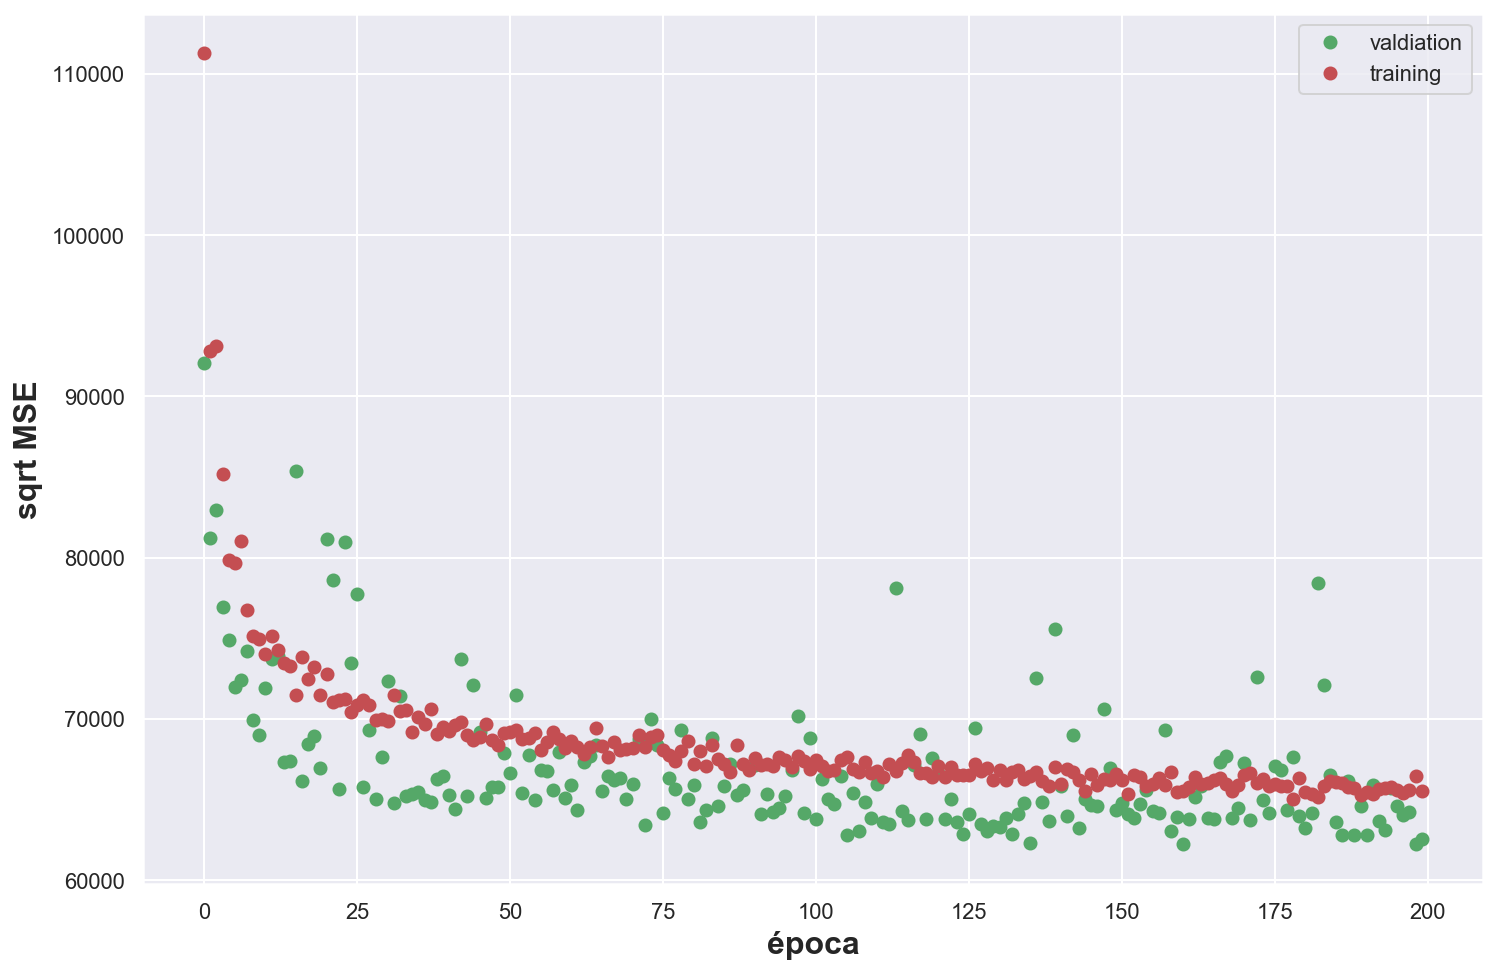

In [73]:
plt.plot(history.history['val_sqrt_mse'], "og", label='valdiation')
plt.plot(history.history['sqrt_mse'], "or", label='training')
plt.xlabel("época",  fontsize=16, fontweight = 'bold')
plt.ylabel("sqrt MSE",  fontsize=16, fontweight = 'bold')
plt.legend()

Se observa un aprendizaje menos fluctuante. Se puede mejorar? Probamos utilizar un optimizador más sofisticado. 
En este caso usamos Adagrad.

In [74]:
opt_adadelta = keras.optimizers.Adagrad(learning_rate=0.1)

In [75]:
model = Sequential()
model.add(Dense(128, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer=opt_adadelta, metrics=[sqrt_mse])

In [76]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=200, verbose=0)

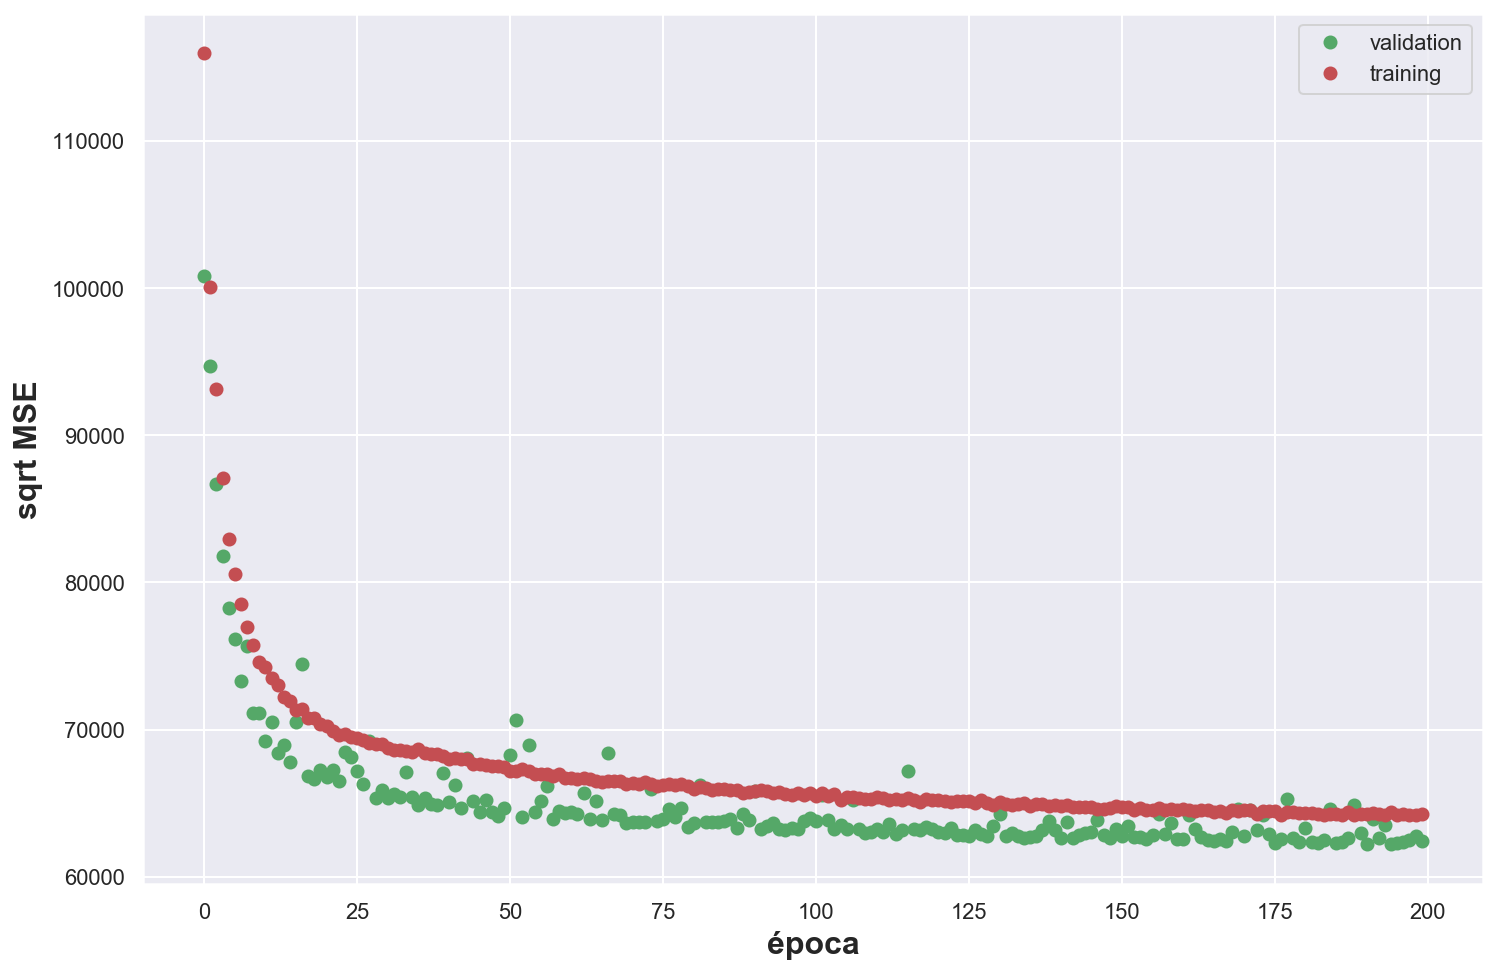

In [78]:
plt.plot(history.history['val_sqrt_mse'], "og", label='validation')
plt.plot(history.history['sqrt_mse'], "or", label='training')
plt.xlabel("época",  fontsize=16, fontweight = 'bold')
plt.ylabel("sqrt MSE",  fontsize=16, fontweight = 'bold')
plt.legend()

Efectivamente el aprendizaje es mejor. Utilizaremos ahora la técnica de early stopping y un checkpoint que enviaremos en el callback del modelo para guardar el mejor punto del entrenamiento.

In [79]:
es = EarlyStopping(monitor='val_sqrt_mse', mode='min', verbose=1, patience=30)

In [80]:
checkpoint = ModelCheckpoint(filepath='mejor_red.h5', monitor='val_sqrt_mse', mode = "min" , save_best_only=True)

In [81]:
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer=opt_adadelta, metrics=[sqrt_mse])

In [82]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=2000, callbacks=[es,checkpoint], verbose=0)

Epoch 00979: early stopping


Ahora cargamos la red guardad. observar que como sqrt es un función custon hay que explicitarlo en la variable *custom_objects*

In [83]:
from keras.models import load_model

model = load_model('mejor_red.h5',custom_objects={'sqrt_mse': sqrt_mse})

In [84]:
predicted = model.predict(x_test)

In [85]:
predicted = [i[0] for i in predicted]

In [86]:
import scipy.stats

pearson = scipy.stats.pearsonr(y_test.values,predicted)
r_cuad = pearson[0]*pearson[0]

(0, 500000)

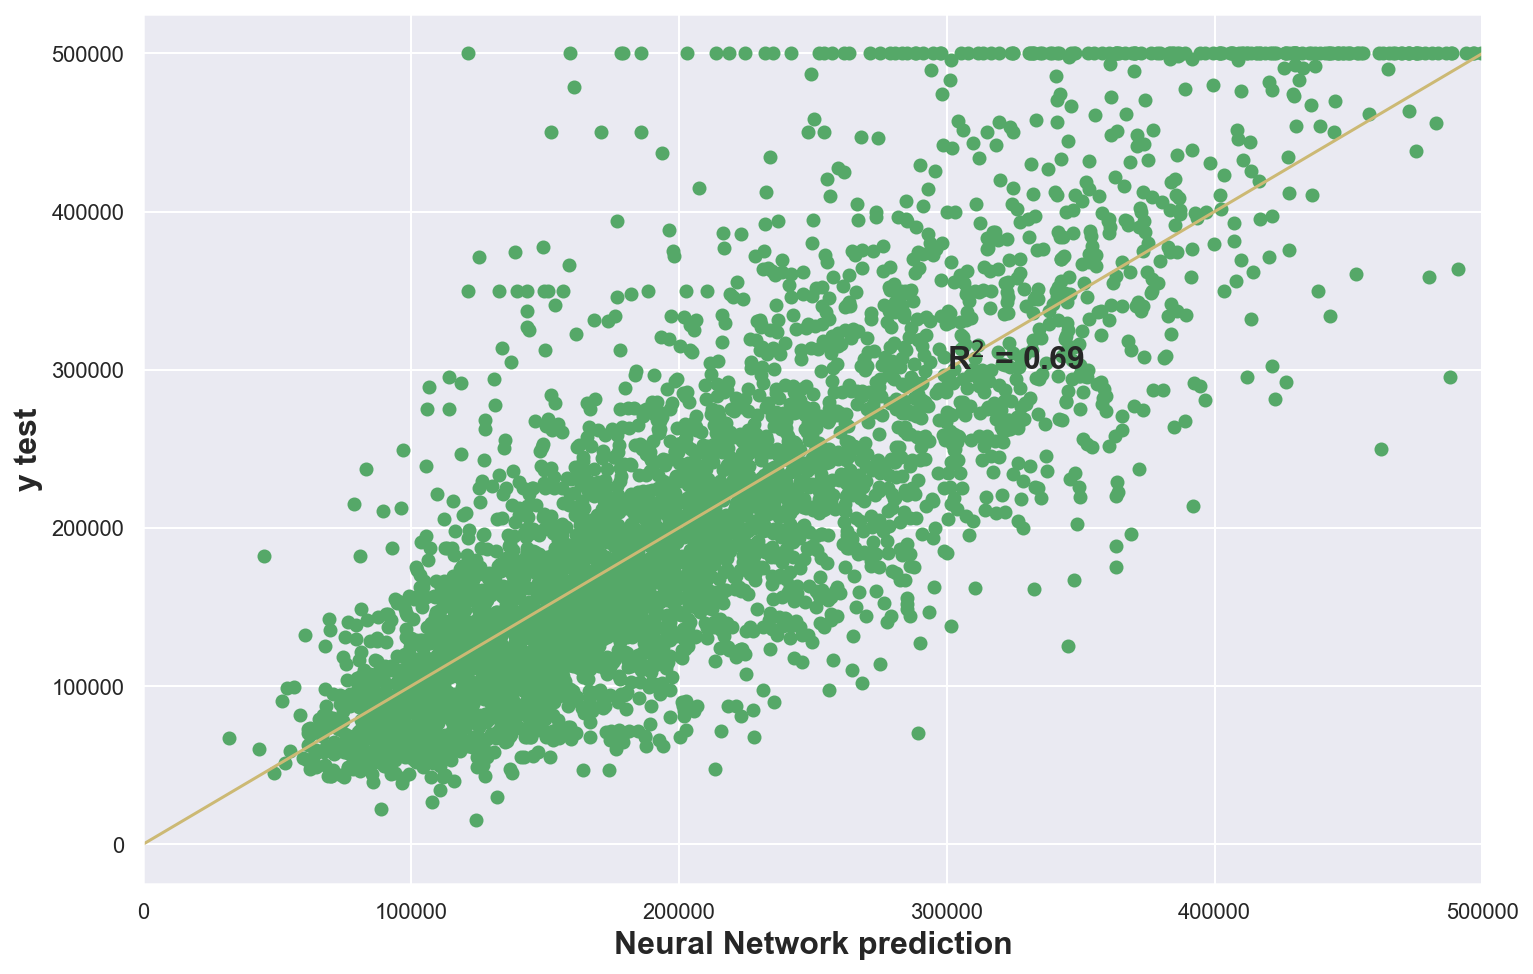

In [87]:
x = np.linspace(50,500000,1000,"-")
plt.plot(predicted, y_test, "og")
plt.plot(x, x, "-y,")
plt.text(300000, 300000,'R$^2$ = ' + '{:.2f}'.format(r_cuad), fontsize=16, fontweight = 'bold' )
plt.xlabel("Neural Network prediction", fontsize=16, fontweight = 'bold')
plt.ylabel("y test", fontsize=16, fontweight = 'bold')
plt.xlim(0,500000)

Observamos que la red tuvo un $R^2$ que esta entre el modelo de Decision Tree y Random Forest entrenado anteriormente

Podemos ahora entrenar otro modelo, cambiando la cantidad de capas y el número de neuronas.

In [88]:
model = Sequential()
model.add(Dense(512, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mean_squared_error', optimizer=opt_adadelta, metrics=[sqrt_mse])

In [89]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=2000, callbacks=[es,checkpoint], verbose=0)

Epoch 01074: early stopping


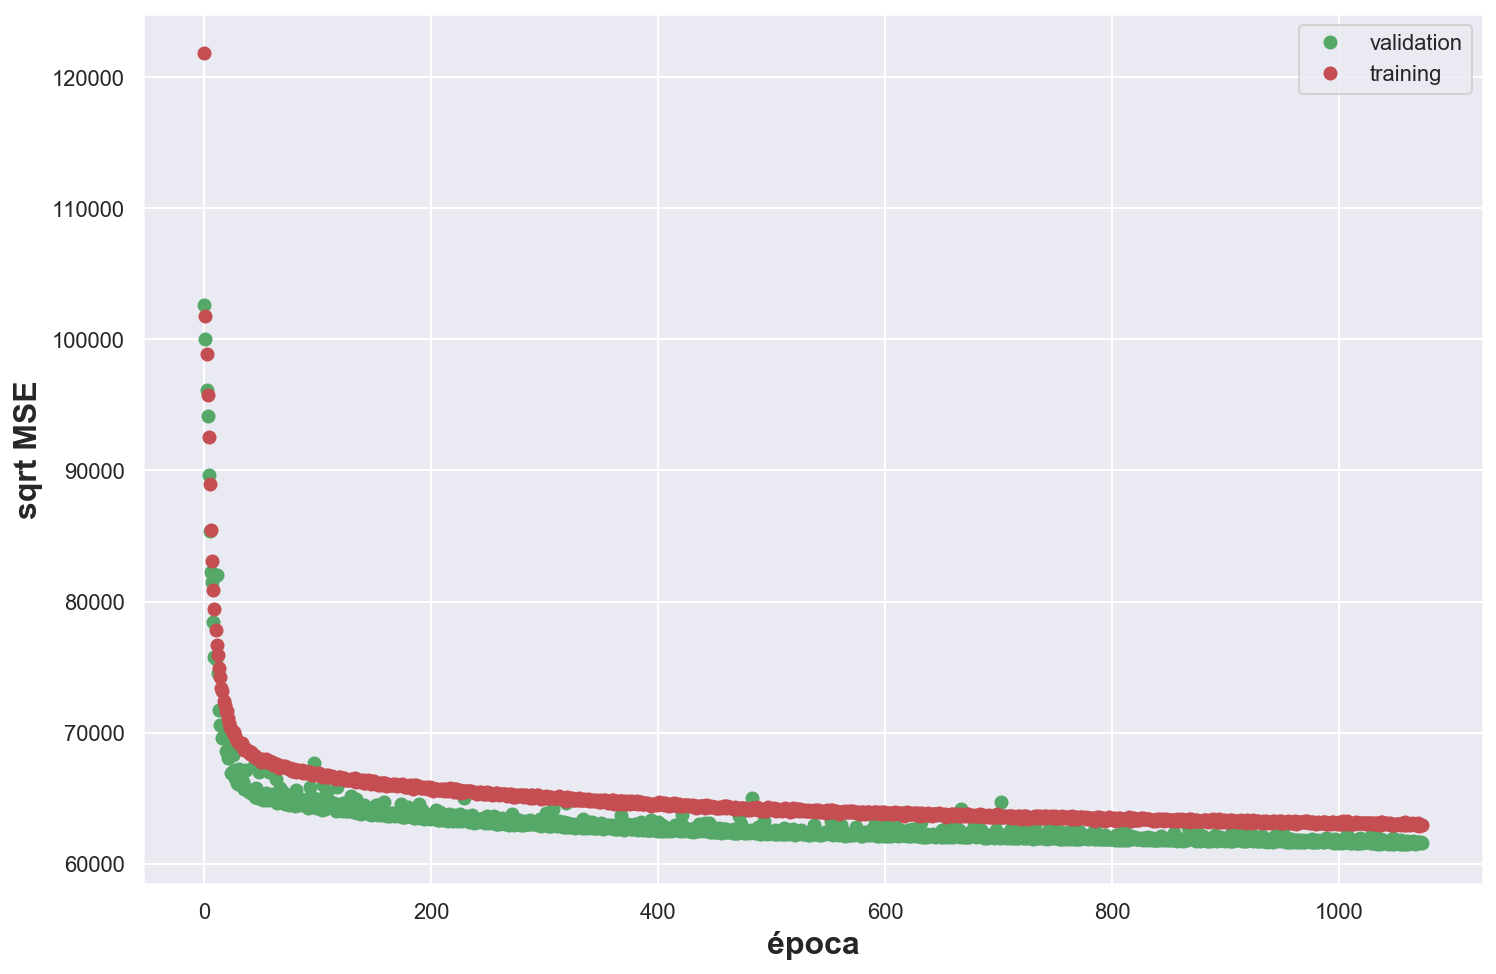

In [90]:
plt.plot(history.history['val_sqrt_mse'], "og", label='validation')
plt.plot(history.history['sqrt_mse'], "or", label='training')
plt.xlabel("época",  fontsize=16, fontweight = 'bold')
plt.ylabel("sqrt MSE",  fontsize=16, fontweight = 'bold')
plt.legend()

Cuales son entonces los pros y contras de entrenar conn redes o con árboles de decisión?

In [291]:
forest_reg.feature_importances_

array([0.1082622 , 0.10889312, 0.05741575, 0.02459021, 0.02520388,
       0.03517853, 0.01900577, 0.50595043, 0.1145155 , 0.0009846 ])

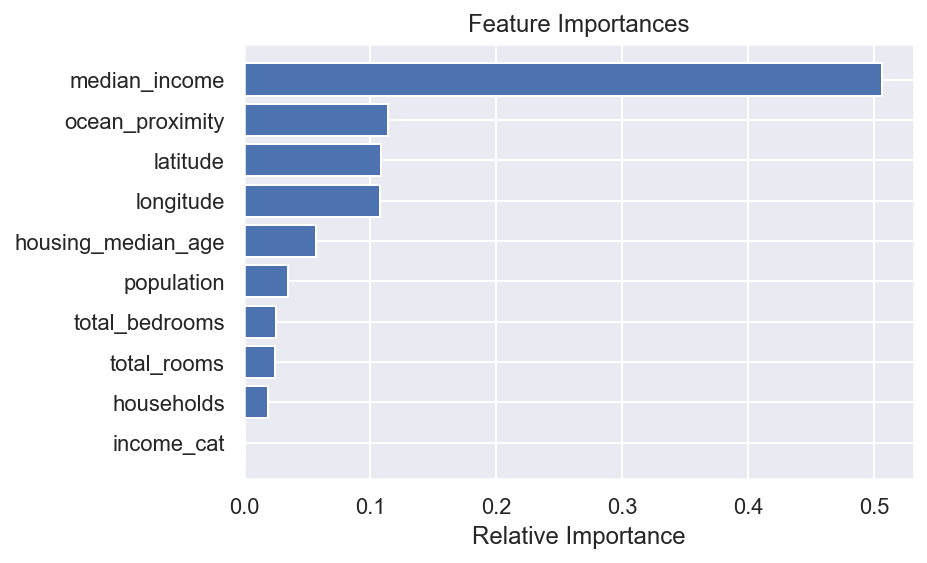

In [297]:
features = x_train.columns
importances = forest_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



Realizamos ahora un ensemble de modelos, tomando el valor final como el promedio de los valores output del modelo de random forest y la nn

In [304]:
ensemble = [sum(x)/2 for x in zip(predicted, housing_predictions_forest)]

In [305]:
pearson = scipy.stats.pearsonr(y_test.values,ensemble)
r_cuad = pearson[0]*pearson[0]

(0, 500000)

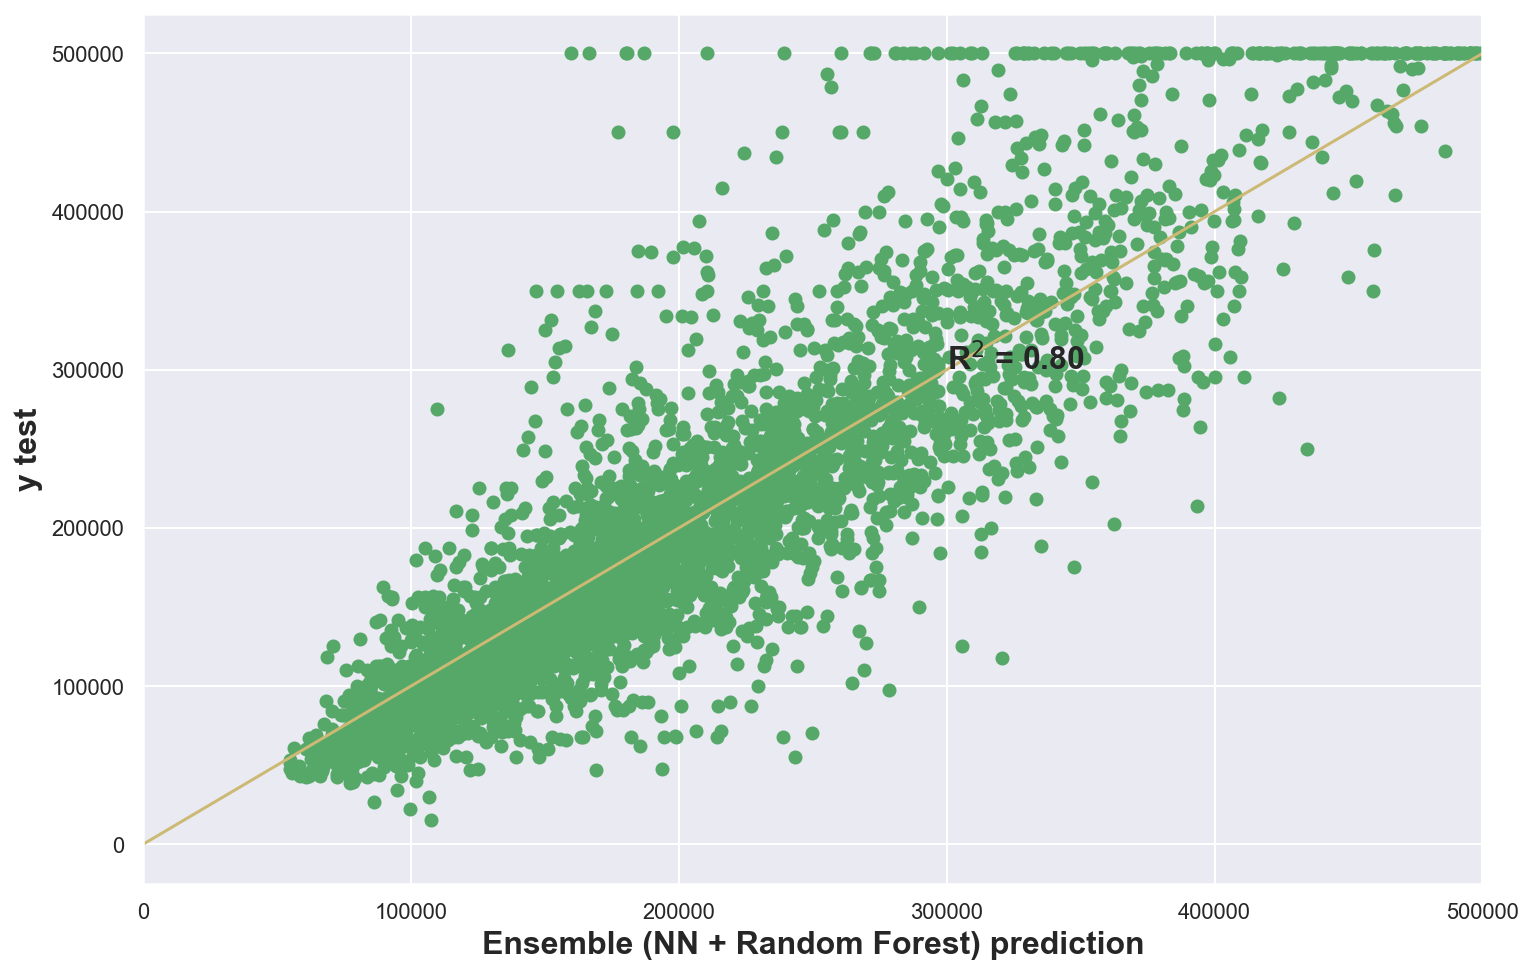

In [311]:
x = np.linspace(50,500000,1000,"-")
plt.plot(ensemble, y_test, "og")
plt.plot(x, x, "-y,")
plt.text(300000, 300000,'R$^2$ = ' + '{:.2f}'.format(r_cuad), fontsize=16, fontweight = 'bold' )
plt.xlabel("Ensemble (NN + Random Forest) prediction", fontsize=16, fontweight = 'bold')
plt.ylabel("y test", fontsize=16, fontweight = 'bold')
plt.xlim(0,500000)

In [322]:
print('NN + Random Forest sqrt MSE: ',np.sqrt(mean_squared_error(ensemble, y_test)))

NN + Random Forest sqrt MSE:  52271.34205698699


In [321]:
print('NN sqrt MSE: ',np.sqrt(mean_squared_error(predicted, y_test)))

NN sqrt MSE:  63388.66008547089


In [320]:
print('Random Forest sqrt MSE: ',np.sqrt(mean_squared_error(housing_predictions_forest, y_test)))

Random Forest sqrt MSE:  51479.74032922304


-Como se podría mejorar la predicción? 

-Como se podría hacer un ensemble distinto?